# CAN Coach Bagfile Analysis

In [ ]:
# Install packages and restart the kernel and don't run this next second
!pip install -U bagpy
!pip install -U strym

In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from strym import strymread
import ntpath
import warnings
warnings.filterwarnings("ignore")
import seaborn as sea

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Loading BokehJS ...

In [2]:
DataFolder = "../Jmscslgroup/PandaData/CanCoachExperiment/"
import glob
baglist = glob.glob(DataFolder+"*.bag")
csvlist = glob.glob(DataFolder+"*.csv")

In [3]:
baglist

['../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-13-13-20-53-ID2.bag',
 '../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-12-18-51-06-ID3.bag',
 '../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-12-19-08-15-ID1.bag']

In [4]:
csvlist

['../Jmscslgroup/PandaData/CanCoachExperiment/2020-10-12-19-08-15-ID1.csv']

In [5]:
b0 = bagreader(baglist[0])
b1 = bagreader(baglist[1])
b2 = bagreader(baglist[2])
b0.topic_table

[INFO]  Data folder ../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-13-13-20-53-ID2 already exists. Not creating.
[INFO]  Data folder ../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-12-18-51-06-ID3 already exists. Not creating.
[INFO]  Data folder ../Jmscslgroup/PandaData/CanCoachExperiment/can_coach_2020-10-12-19-08-15-ID1 already exists. Not creating.


Topics                       Types  \
0                /ego_dist_traveled  geometry_msgs/PointStamped   
1                    /feedback_type              std_msgs/UInt8   
2                          /ghostTh            std_msgs/Float64   
3              /ghost_dist_traveled  geometry_msgs/PointStamped   
4                /ghost_vehicle/vel  geometry_msgs/TwistStamped   
5                        /highbeams         geometry_msgs/Twist   
6                             /mode              std_msgs/UInt8   
7                      /modeChanger               std_msgs/Int8   
8                             /relv            std_msgs/Float64   
9                           /rosout           rosgraph_msgs/Log   
10                      /rosout_agg           rosgraph_msgs/Log   
11                        /setpoint            std_msgs/Float64   
12                       /space_gap            std_msgs/Float64   
13                        /track_a0  geometry_msgs/PointStamped   
14                        /track_a1  geometry_msgs/PointStamped   
15                       /track_a10  geometry_msgs/PointStamped   
16                       /track_a11  geometry_msgs/PointStamped   
17                       /track_a12  geometry_msgs/PointStamped   
18                       /track_a13  geometry_msgs/PointStamped   
19                       /track_a14  geometry_msgs/PointStamped   
20                       /track_a15  geometry_msgs/PointStamped   
21                        /track_a2  geometry_msgs/PointStamped   
22                        /track_a3  geometry_msgs/PointStamped   
23                        /track_a4  geometry_msgs/PointStamped   
24                        /track_a5  geometry_msgs/PointStamped   
25                        /track_a6  geometry_msgs/PointStamped   
26                        /track_a7  geometry_msgs/PointStamped   
27                        /track_a8  geometry_msgs/PointStamped   
28                        /track_a9  geometry_msgs/PointStamped   
29                   /vehicle/accel  geometry_msgs/AccelStamped   
30  /vehicle/distanceEstimator/dist  geometry_msgs/PointStamped   
31          /vehicle/steering_angle  geometry_msgs/PointStamped   
32                     /vehicle/vel  geometry_msgs/TwistStamped   

    Message Count  Frequency  
0            6706  12.496623  
1            6860   1.999982  
2             830   1.261494  
3            6048   9.948728  
4           21330  39.979259  
5            3432   0.999969  
6            6860   2.000003  
7          257734  85.484643  
8           15442   4.981365  
9            1505   1.204266  
10           1504   1.202430  
11           6860   2.000007  
12          15442   4.977304  
13          68622  20.008701  
14          68623  20.009942  
15          68589  20.032018  
16          68594  20.037282  
17          68589  20.040058  
18          68589  20.045038  
19          68587  20.050213  
20          68587  20.053184  
21          68615  20.010038  
22          68615  20.013188  
23          68605  20.008606  
24          68609  20.014430  
25          68597  20.020353  
26          68599  20.022647  
27          68626  20.027331  
28          68628  20.032784  
29         132354  38.652549  
30          17156   4.999576  
31         264701  78.167356  
32         132378  38.678212

In [12]:
def th_kde_plot(b):
    speed_file = b.message_by_topic('/vehicle/vel')
    speed = pd.read_csv(speed_file)
    space_gap_file = b.message_by_topic('/space_gap')
    space_gap = pd.read_csv(space_gap_file)
    ghost_file = b.message_by_topic('/ghostTh')
    ghost = pd.read_csv(ghost_file)


    strymread.ranalyze(speed, title='Speed')
    strymread.ranalyze(space_gap, title='Space Gap')

    speed_resampled, spacegap_resampled = strymread.ts_sync(
        speed.rename(columns={"twist.linear.x": "Message"}), 
        space_gap.rename(columns={"data": "Message"}), rate = 5, method='nearest')

    fig, ax = bagpy.create_fig(1)
    ax[0].scatter( x = 'Time', y = 'twist.linear.x', data = speed, s = 3, marker = 'o', label = 'Original Speed')
    ax[0].scatter(x = 'Time', y = 'Message', data = speed_resampled,s = 1, alpha = 0.5, marker = 'x', label='Speed resampled at 5 Hz')
    ax[0].legend()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('m/s')
    fig.show()

    fig, ax = bagpy.create_fig(1)
    ax[0].scatter( x = 'Time', y = 'data', data = space_gap, s = 3, marker = 'o', label = 'Original space gap')
    ax[0].scatter(x = 'Time', y = 'Message', data = spacegap_resampled,s = 1, alpha = 0.5, marker = 'x', 
                  label='space gap resampled at 5 Hz')
    ax[0].legend()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('m')
    fig.show()

    timeheadway = pd.DataFrame()
    timeheadway['Time'] = spacegap_resampled['Time']
    timeheadway['Message'] = spacegap_resampled['Message']/speed_resampled['Message']
    timeheadway.replace([np.inf, -np.inf], np.nan, inplace = True)
    timeheadway.dropna(inplace=True)

    fig, ax = strymread.create_fig(1)
    ax[0].scatter(x = 'Time', y = 'Message', data= timeheadway, s = 1, c = 'Time', cmap = strymread.sunset, label = 'Time Headway')
    ax[0].legend()
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('seconds')
    ax[0].set_title(ntpath.basename(b.filename))
    fig.show()
    
    setpoint_file = b.message_by_topic('/setpoint')
    mode_file = b.message_by_topic('/mode')
    relv_file = b.message_by_topic('/relv')
    mode = pd.read_csv(mode_file)
    setpoint = pd.read_csv(setpoint_file)
    relv = pd.read_csv(relv_file)

    setpoint_resample, timeheadway_resampled = strymread.ts_sync(
        setpoint.rename(columns={"data": "Message"}), 
        timeheadway, rate = 1, method='nearest')

    mode_resampled, _ = strymread.ts_sync(
        mode.rename(columns={"data": "Message"}), 
        timeheadway, rate = 1, method='nearest')

    relv_resampled, _ = strymread.ts_sync(
        relv.rename(columns={"data": "Message"}), 
        setpoint_resample, rate = 'second', method='nearest')
    
    ghost_resampled, _ = strymread.ts_sync(
        ghost.rename(columns={"data": "Message"}), 
        setpoint_resample, rate = 'second', method='nearest')

    fig, ax = strymread.create_fig(1)
    ax[0].scatter(x = 'Time', y = 'Message', data = setpoint_resample, s = 1, label = 'Set Point')
    ax[0].scatter(x = 'Time', y = 'Message', data = timeheadway_resampled, s = 1, label = 'Timeheadway (s)')
    ax[0].scatter(x = 'Time', y = 'Message', data = mode_resampled, s = 1, label = 'Mode')
    ax[0].scatter(x = 'Time', y = 'Message', data = relv_resampled, s = 1, label = 'Relative Velocity')
    ax[0].scatter(x = 'Time', y = 'Message', data = ghost_resampled, s = 1, label = 'Ghost TH')
    ax[0].set_xlabel('Time')
    
    ax[0].legend()
    fig.show()


    # Construct a joint dataframe consisting of setpoints and timeheadway
    setpoint_th = pd.DataFrame()
    setpoint_th['Time'] = setpoint_resample['Time']
    setpoint_th['setpoint'] = setpoint_resample['Message']
    setpoint_th['timeheadway'] = timeheadway_resampled['Message']
    setpoint_th['mode'] = mode_resampled['Message']
    setpoint_th['relv'] = relv_resampled['Message']
    setpoint_th['ghosth'] = ghost_resampled['Message']


    modes = setpoint_th['mode'].unique()
    mode_dict = {1: 'Normal Driving', 6: 'Instructed Velocity Matching', 
            7: 'Coached Velocity Matching', 2: 'Constant Time Headway',
            3: 'Coached Constant Time Headway', 4: 'Instructed Dynamic Time Headway',
            5: 'Coach Dynamic Time Headway', 8: 'Ghost'}
    

    nc = int( np.sqrt(len(modes)))+1
    fig, ax = strymread.create_fig(ncols = 2)
    fig.set_figwidth(30)
    fig.set_figheight(12)
    k = 0
    for i, m in enumerate(modes):
        setpoint_mode = setpoint_th[setpoint_th['mode'] == m]
        
        sp = setpoint_mode['setpoint'].unique()
        for s in sp:
            sp_mode = setpoint_mode[setpoint_mode['setpoint'] == s]
#            if m == 6 or m == 7:
            #sp_mode1  = sp_mode[sp_mode.relv < sp_mode.relv.quantile(.7)]
            sp_mode1 = sp_mode[sp_mode.relv.between(sp_mode.relv.quantile(.05), sp_mode.relv.quantile(.95))] # without outliers
            sea.kdeplot(data=sp_mode1, x="relv", 
                        label = 'Mode: {}, Setpoint: {}'.format(mode_dict[m], s),
                        fill=True, common_norm=False, palette="Paired", 
                        alpha=.5, linewidth=0, ax = ax[0])
            if m == 8:
                sp_mode1 = sp_mode[sp_mode.ghosth.between(sp_mode.ghosth.quantile(.05), sp_mode.ghosth.quantile(.95))] # without outliers
                sea.kdeplot(data=sp_mode1, x="ghosth",
                            label = 'Mode: {}, Setpoint: {}'.format(mode_dict[m], s),
                            fill=True, common_norm=False, palette="Paired", 
                            alpha=.5, linewidth=0, ax = ax[1])
            else:
                sp_mode1 = sp_mode[sp_mode.timeheadway.between(sp_mode.timeheadway.quantile(.05), sp_mode.timeheadway.quantile(.95))] # without outliers
                sea.kdeplot(data=sp_mode1, x="timeheadway",
                            label = 'Mode: {}, Setpoint: {}'.format(mode_dict[m], s),
                            fill=True, common_norm=False, palette="Paired", 
                            alpha=.5, linewidth=0, ax = ax[1])
            k =k +1 
            
    ax[0].legend(loc = 'upper left', fontsize = 16)
    ax[1].legend(loc = 'upper left', fontsize = 16)
    
    ax[0].set_title("Relative Velocity Distribution")
    ax[1].set_title("Time headway Distribution")
    my_suptitle = fig.suptitle(ntpath.basename(b.bagfile), y = 1.01)
    fig.savefig('figures/densityPlot-I_{}.png'.format(ntpath.basename(b.bagfile[0:-4])),
               dpi = 100,bbox_inches='tight',bbox_extra_artists=[my_suptitle])
    fig.show()
    
    #####################################################################
    fig, ax = strymread.create_fig(nrows = nc, ncols = nc)
    fig.set_figwidth(35)
    fig.set_figheight(35)
    for i, m in enumerate(modes):
        setpoint_mode = setpoint_th[setpoint_th['mode'] == m]

        if m == 6 or m == 7:
            sea.kdeplot(data=setpoint_mode, x="relv", hue="setpoint", 
                        fill=True, common_norm=False, palette="pastel",
   alpha=.5, linewidth=0, ax = ax[i])
        elif m == 8:
            sea.kdeplot(data=setpoint_mode, x="ghosth", hue="setpoint", 
                        fill=True, common_norm=False, palette="pastel",
   alpha=.5, linewidth=0, ax = ax[i])
        else:
            sea.kdeplot(data=setpoint_mode, x="timeheadway", hue="setpoint", 
                        fill=True, common_norm=False, palette="pastel",
   alpha=.5, linewidth=0, ax = ax[i])
        ax[i].set_title("Mode: {}".format(mode_dict[m]))
    my_suptitle = fig.suptitle(ntpath.basename(b.bagfile), y = 1.02)
    fig.savefig('figures/densityPlot-II_{}.png'.format(ntpath.basename(b.bagfile[0:-4])),
               dpi = 100,bbox_inches='tight',bbox_extra_artists=[my_suptitle])
    fig.show()

In [44]:
def multi_bag_kde(bs):
    fig, ax = strymread.create_fig(nrows = 3, ncols = 3)
    fig.set_figwidth(35)
    fig.set_figheight(35)
    k = 0
    color_long = ['#463F1A','#60492C', '#F9EBE0', '#208AAE', '#0D2149',\
                  '#9ff9c1','#cb9173','#fdcff3',\
                  '#2c80ff','#ffab2b','#ff2b38', '#06b4ff','#23d160',\
                  '#264653','#E9C46A',"#7900D7", "#A77500", "#6367A9", \
                  "#A05837", "#772600", "#9B9700",'#E76F51',\
                  '#B07BAC',"#7A87A1",'#5F7367','#472836',\
                  "#00489C","#CB7E98", "#6F0062", "#EEC3FF",\
              '#97D8B2','#17BEBB','#C4A69D','#FCFF6C','#000000','#FFFFC7',\
              '#DB5461','#016FB9','#E56399','#D17B0F','#FFFC31','#772F1A',\
              '#808080','#000000', "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", \
              "#008941", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", \
              "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", \
              "#809693", "#6A3A4C", "#1B4400", "#4FC601", "#3B5DFF","#4A3B53", \
              "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", \
              "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",\
              "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",\
              "#456D75", "#B77B68", "#788D66",\
              "#885578", "#FAD09F", "#1F819A", "#D157A0", "#BEC459", "#000080", "#0086ED", "#886F4C",\
              "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",\
              "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",\
              "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",\
              "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",\
              "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#46f0f0", "#324E72"]
    
    mode_dict = {1: 'Normal Driving', 6: 'Instructed Velocity Matching', 
            7: 'Coached Velocity Matching', 2: 'Constant Time Headway',
            3: 'Coached Constant Time Headway', 4: 'Instructed Dynamic Time Headway',
            5: 'Coach Dynamic Time Headway', 8: 'Ghost'}
    

    
    for b in bs:
        speed_file = b.message_by_topic('/vehicle/vel')
        speed = pd.read_csv(speed_file)
        space_gap_file = b.message_by_topic('/space_gap')
        space_gap = pd.read_csv(space_gap_file)
        ghost_file = b.message_by_topic('/ghostTh')
        ghost = pd.read_csv(ghost_file)

        speed_resampled, spacegap_resampled = strymread.ts_sync(
            speed.rename(columns={"twist.linear.x": "Message"}), 
            space_gap.rename(columns={"data": "Message"}), rate = 5, method='nearest')
        
        timeheadway = pd.DataFrame()
        timeheadway['Time'] = spacegap_resampled['Time']
        timeheadway['Message'] = spacegap_resampled['Message']/speed_resampled['Message']
        timeheadway.replace([np.inf, -np.inf], np.nan, inplace = True)
        timeheadway.dropna(inplace=True)
        
        setpoint_file = b.message_by_topic('/setpoint')
        mode_file = b.message_by_topic('/mode')
        relv_file = b.message_by_topic('/relv')
        mode = pd.read_csv(mode_file)
        setpoint = pd.read_csv(setpoint_file)
        relv = pd.read_csv(relv_file)

        setpoint_resample, timeheadway_resampled = strymread.ts_sync(
            setpoint.rename(columns={"data": "Message"}), 
            timeheadway, rate = 1, method='nearest')

        mode_resampled, _ = strymread.ts_sync(
            mode.rename(columns={"data": "Message"}), 
            timeheadway, rate = 1, method='nearest')

        relv_resampled, _ = strymread.ts_sync(
            relv.rename(columns={"data": "Message"}), 
            setpoint_resample, rate = 'second', method='nearest')

        ghost_resampled, _ = strymread.ts_sync(
            ghost.rename(columns={"data": "Message"}), 
            setpoint_resample, rate = 'second', method='nearest')
        
        # Construct a joint dataframe consisting of setpoints and timeheadway
        setpoint_th = pd.DataFrame()
        setpoint_th['Time'] = setpoint_resample['Time']
        setpoint_th['setpoint'] = setpoint_resample['Message']
        setpoint_th['timeheadway'] = timeheadway_resampled['Message']
        setpoint_th['mode'] = mode_resampled['Message']
        setpoint_th['relv'] = relv_resampled['Message']
        setpoint_th['ghosth'] = ghost_resampled['Message']


        modes = setpoint_th['mode'].unique()
        
        for i, m in enumerate(modes):
            setpoint_mode = setpoint_th[setpoint_th['mode'] == m]
            sp = setpoint_mode['setpoint'].unique()
            for s in sp:
                sp_mode = setpoint_mode[setpoint_mode['setpoint'] == s]
                if m == 6 or m == 7:
                    sp_mode1 = sp_mode[sp_mode.relv.between(
                        sp_mode.relv.quantile(.05), sp_mode.relv.quantile(.95))] # without outliers
                    sea.kdeplot(data=sp_mode1, x="relv", 
                                label = '{}: Setpoint: {}'.format(ntpath.basename(b.bagfile[0:-4]), s),
                                fill=True, common_norm=False,
                                alpha=.65, linewidth=4, ax = ax[i], color = color_long[k])
                elif m == 8:
                    sp_mode1 = sp_mode[sp_mode.ghosth.between(
                        sp_mode.ghosth.quantile(.05), sp_mode.ghosth.quantile(.95))] # without outliers
                    sea.kdeplot(data=sp_mode1, x="ghosth",
                                label = '{}: Setpoint: {}'.format(ntpath.basename(b.bagfile[0:-4]), s),
                                fill=True, common_norm=False, 
                                alpha=.65, linewidth=4, ax = ax[i], color = color_long[k])
                else:
                    sp_mode1 = sp_mode[sp_mode.timeheadway.between(
                        sp_mode.timeheadway.quantile(.05), sp_mode.timeheadway.quantile(.95))] # without outliers
                    sea.kdeplot(data=sp_mode1, x="timeheadway",
                                label = '{}: Setpoint: {}'.format(ntpath.basename(b.bagfile[0:-4]), s),
                                fill=True, common_norm=False, 
                            alpha=.5, linewidth=4, ax = ax[i], color = color_long[k])
                k = k + 1
            ax[i].set_title("Mode: {}".format(mode_dict[m]))
            ax[i].legend(loc = 'upper left', fontsize = 20)
                
    my_suptitle = fig.suptitle('Aggregated Density Plot', y = 1.02)
    fig.savefig('figures/densityPlot-Aggregated.png',
               dpi = 100,bbox_inches='tight',bbox_extra_artists=[my_suptitle])
    fig.show()


## Specific Analysis
### Bag File with ID-2
### Time headway plot, KDE plot

Analyzing Timestamp and Data Rate of Speed
Interquartile Range of Rate for Speed is 9.339122652529781 


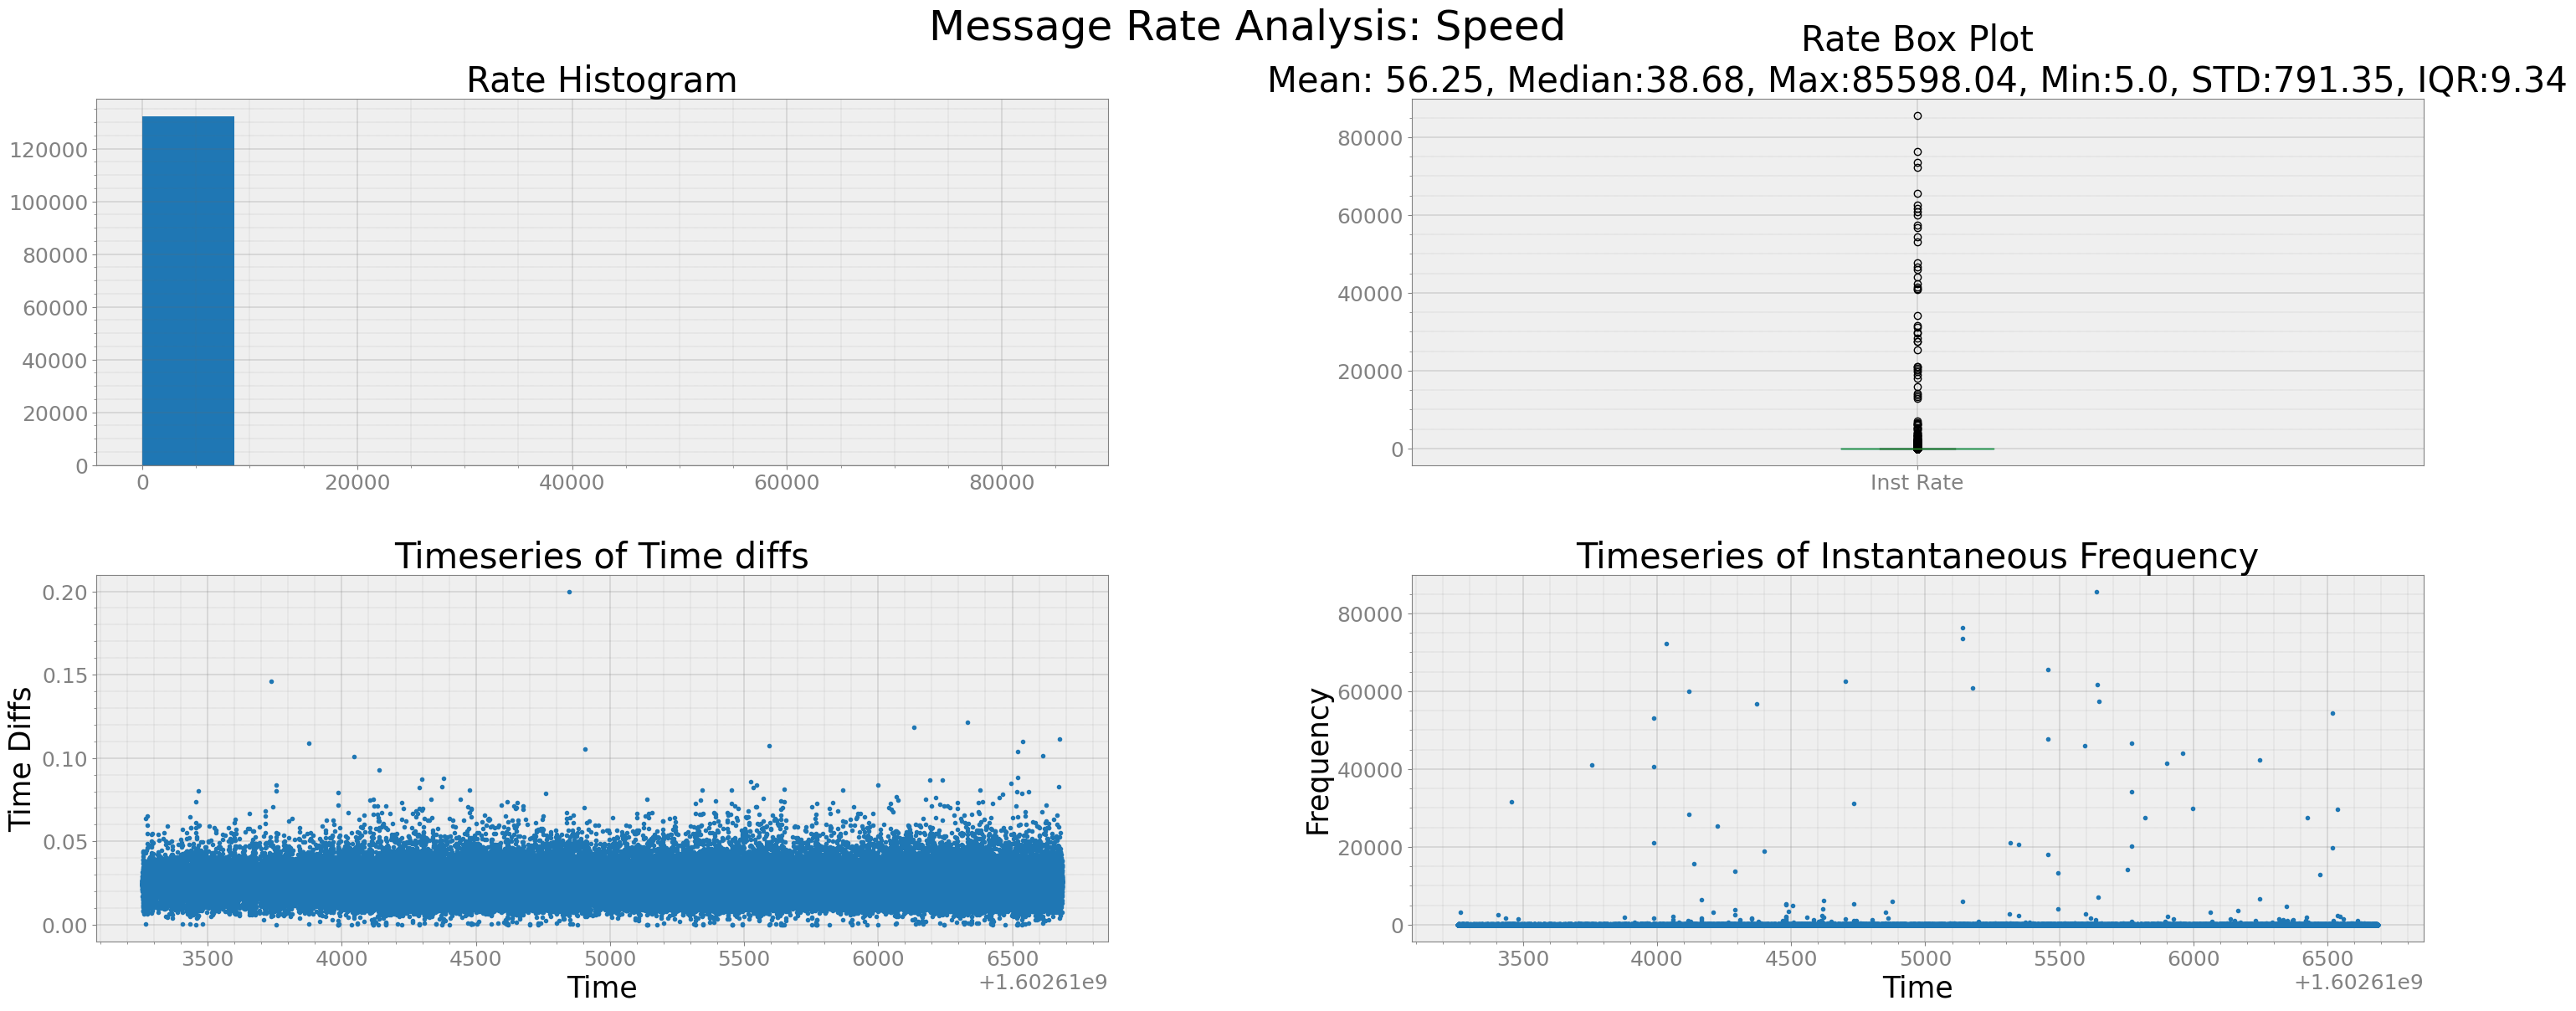

Analyzing Timestamp and Data Rate of Space Gap
Interquartile Range of Rate for Space Gap is 0.2818089978300389 


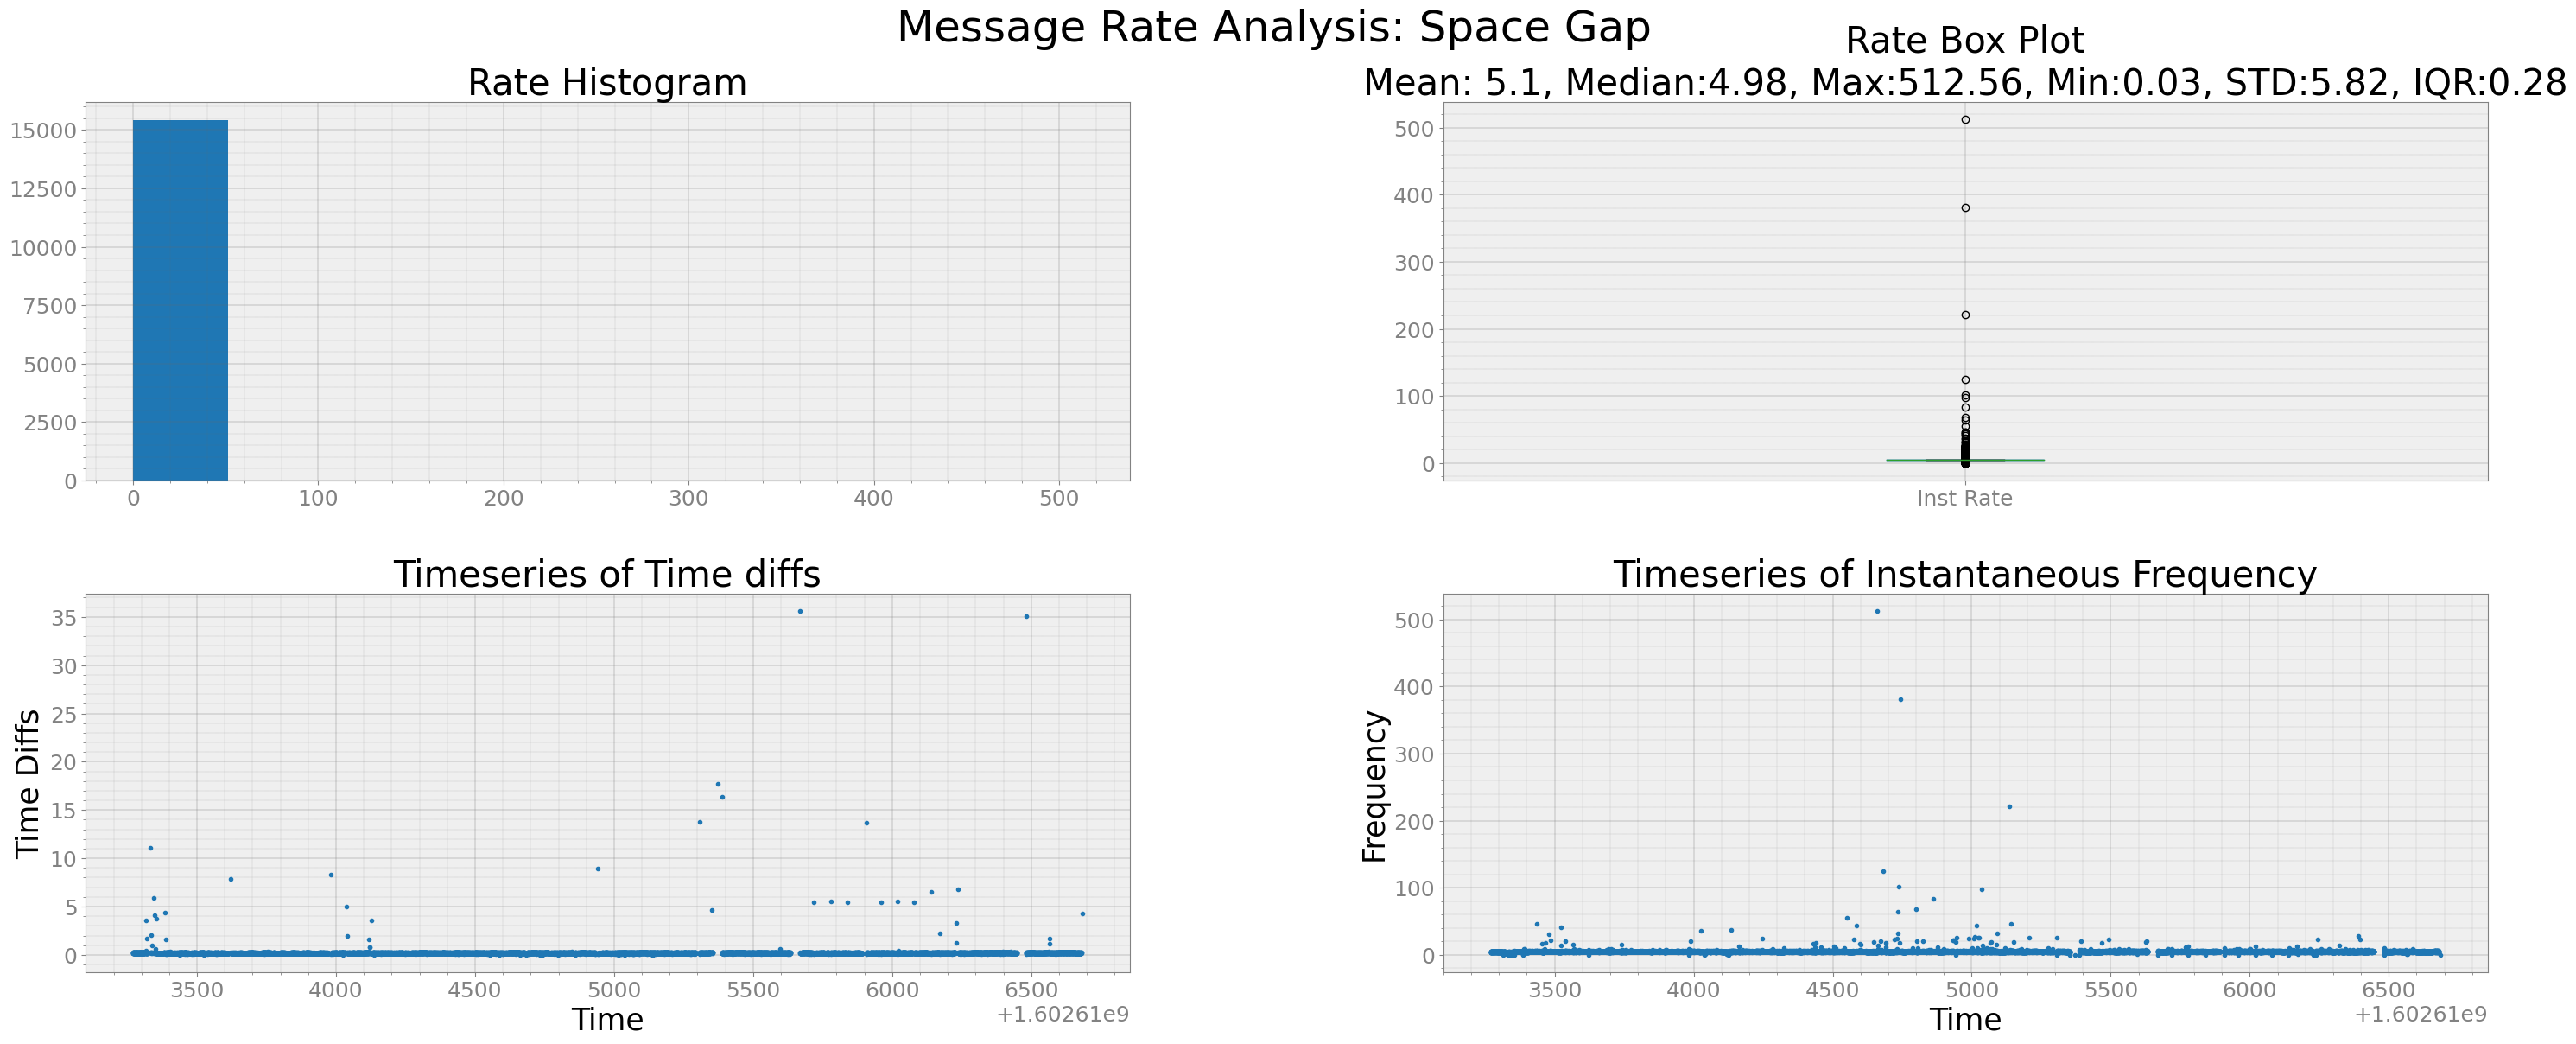

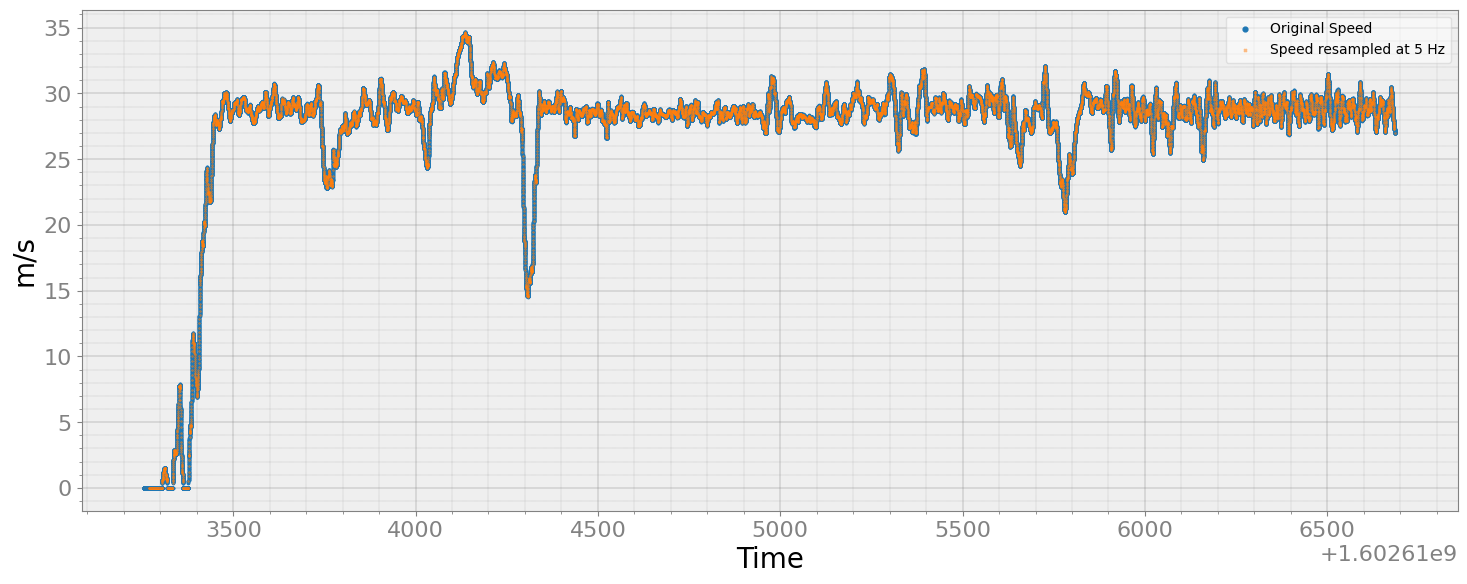

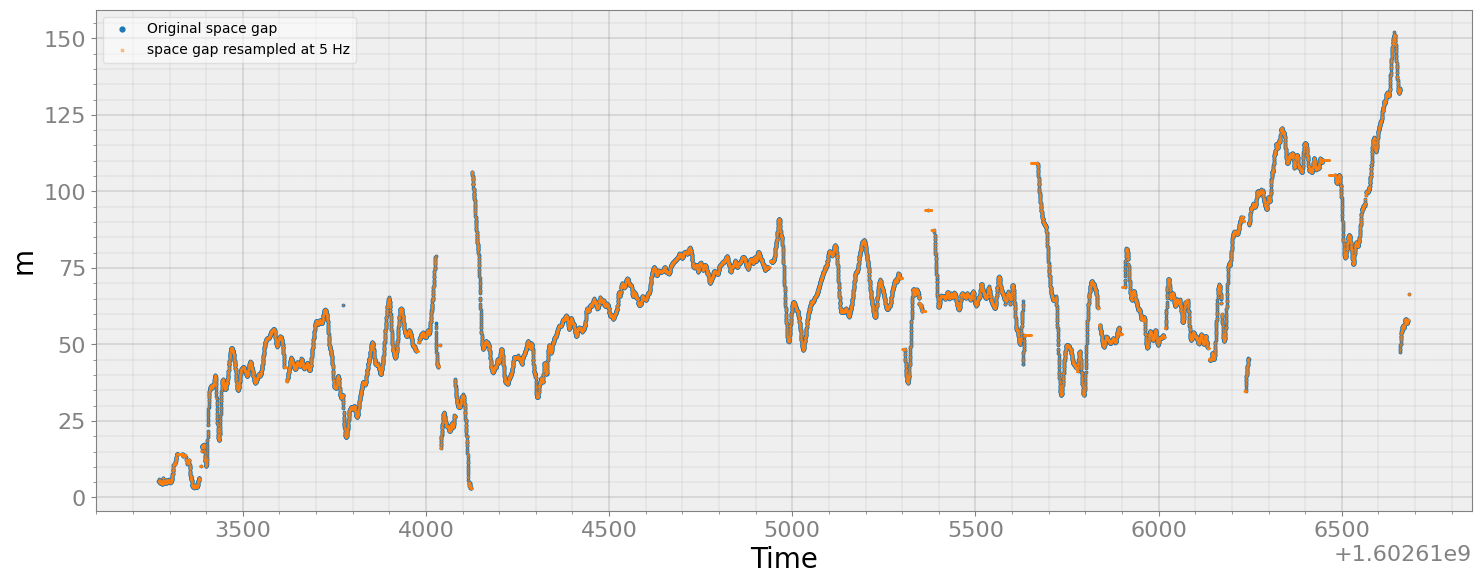

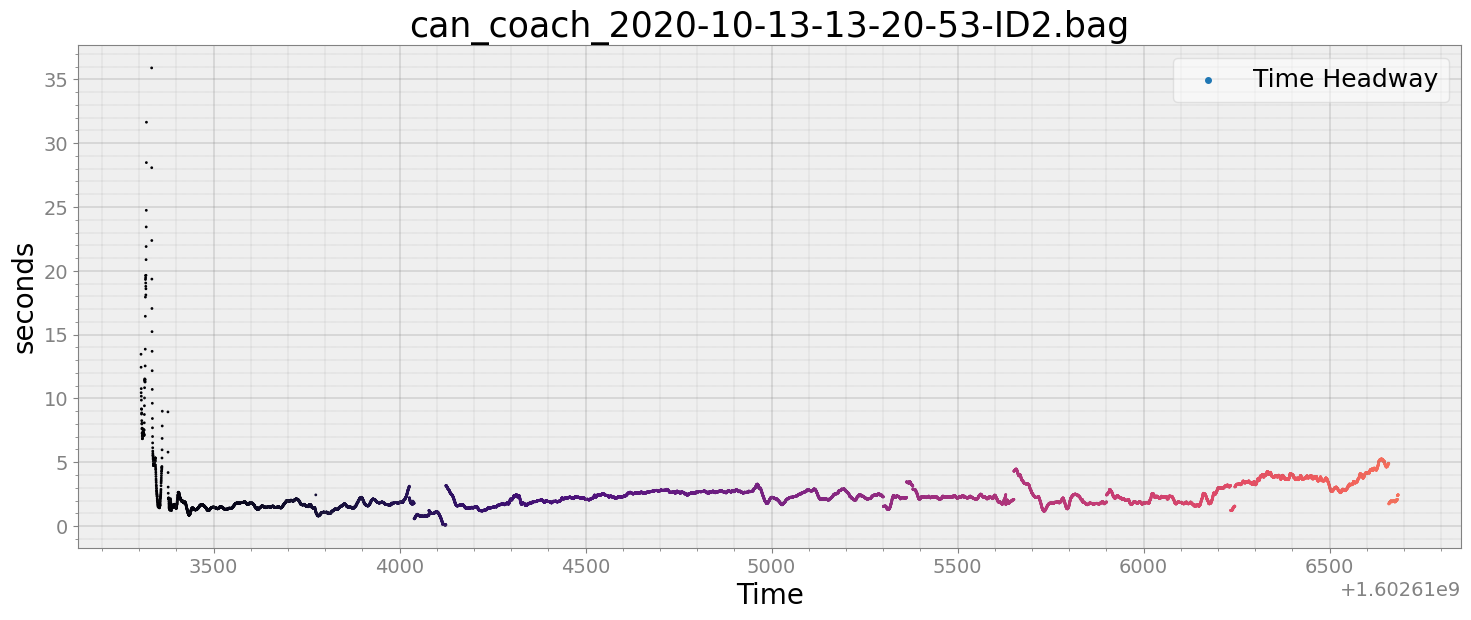

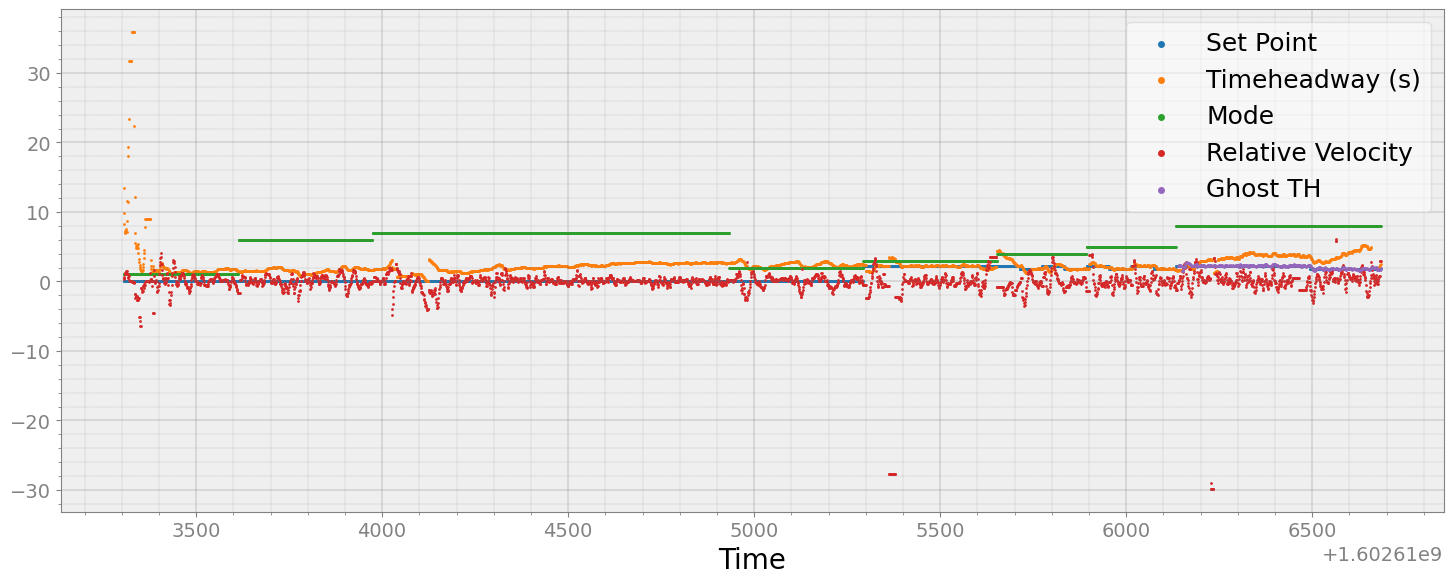

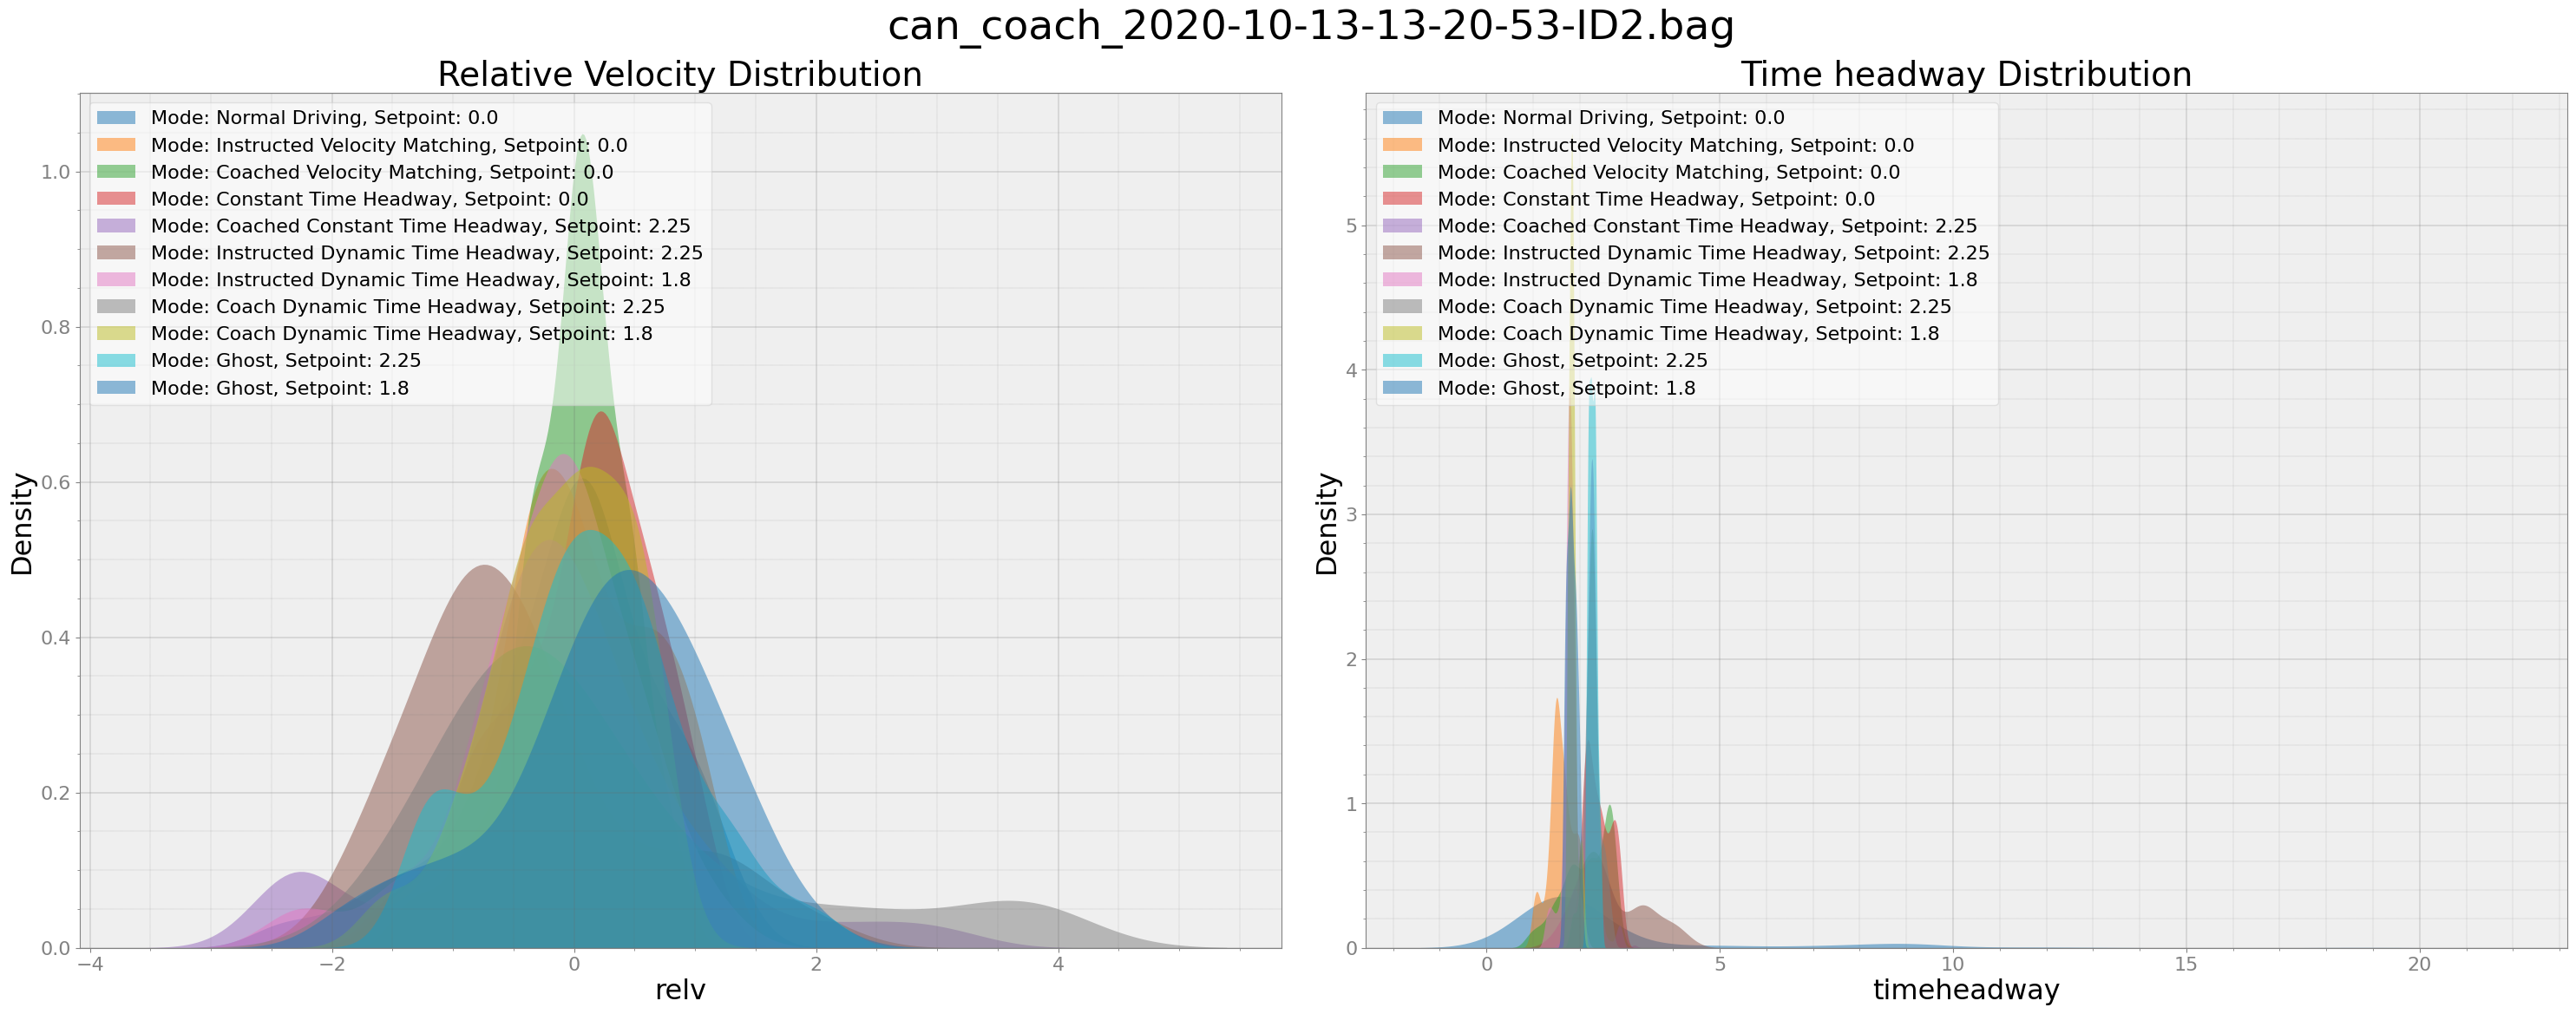

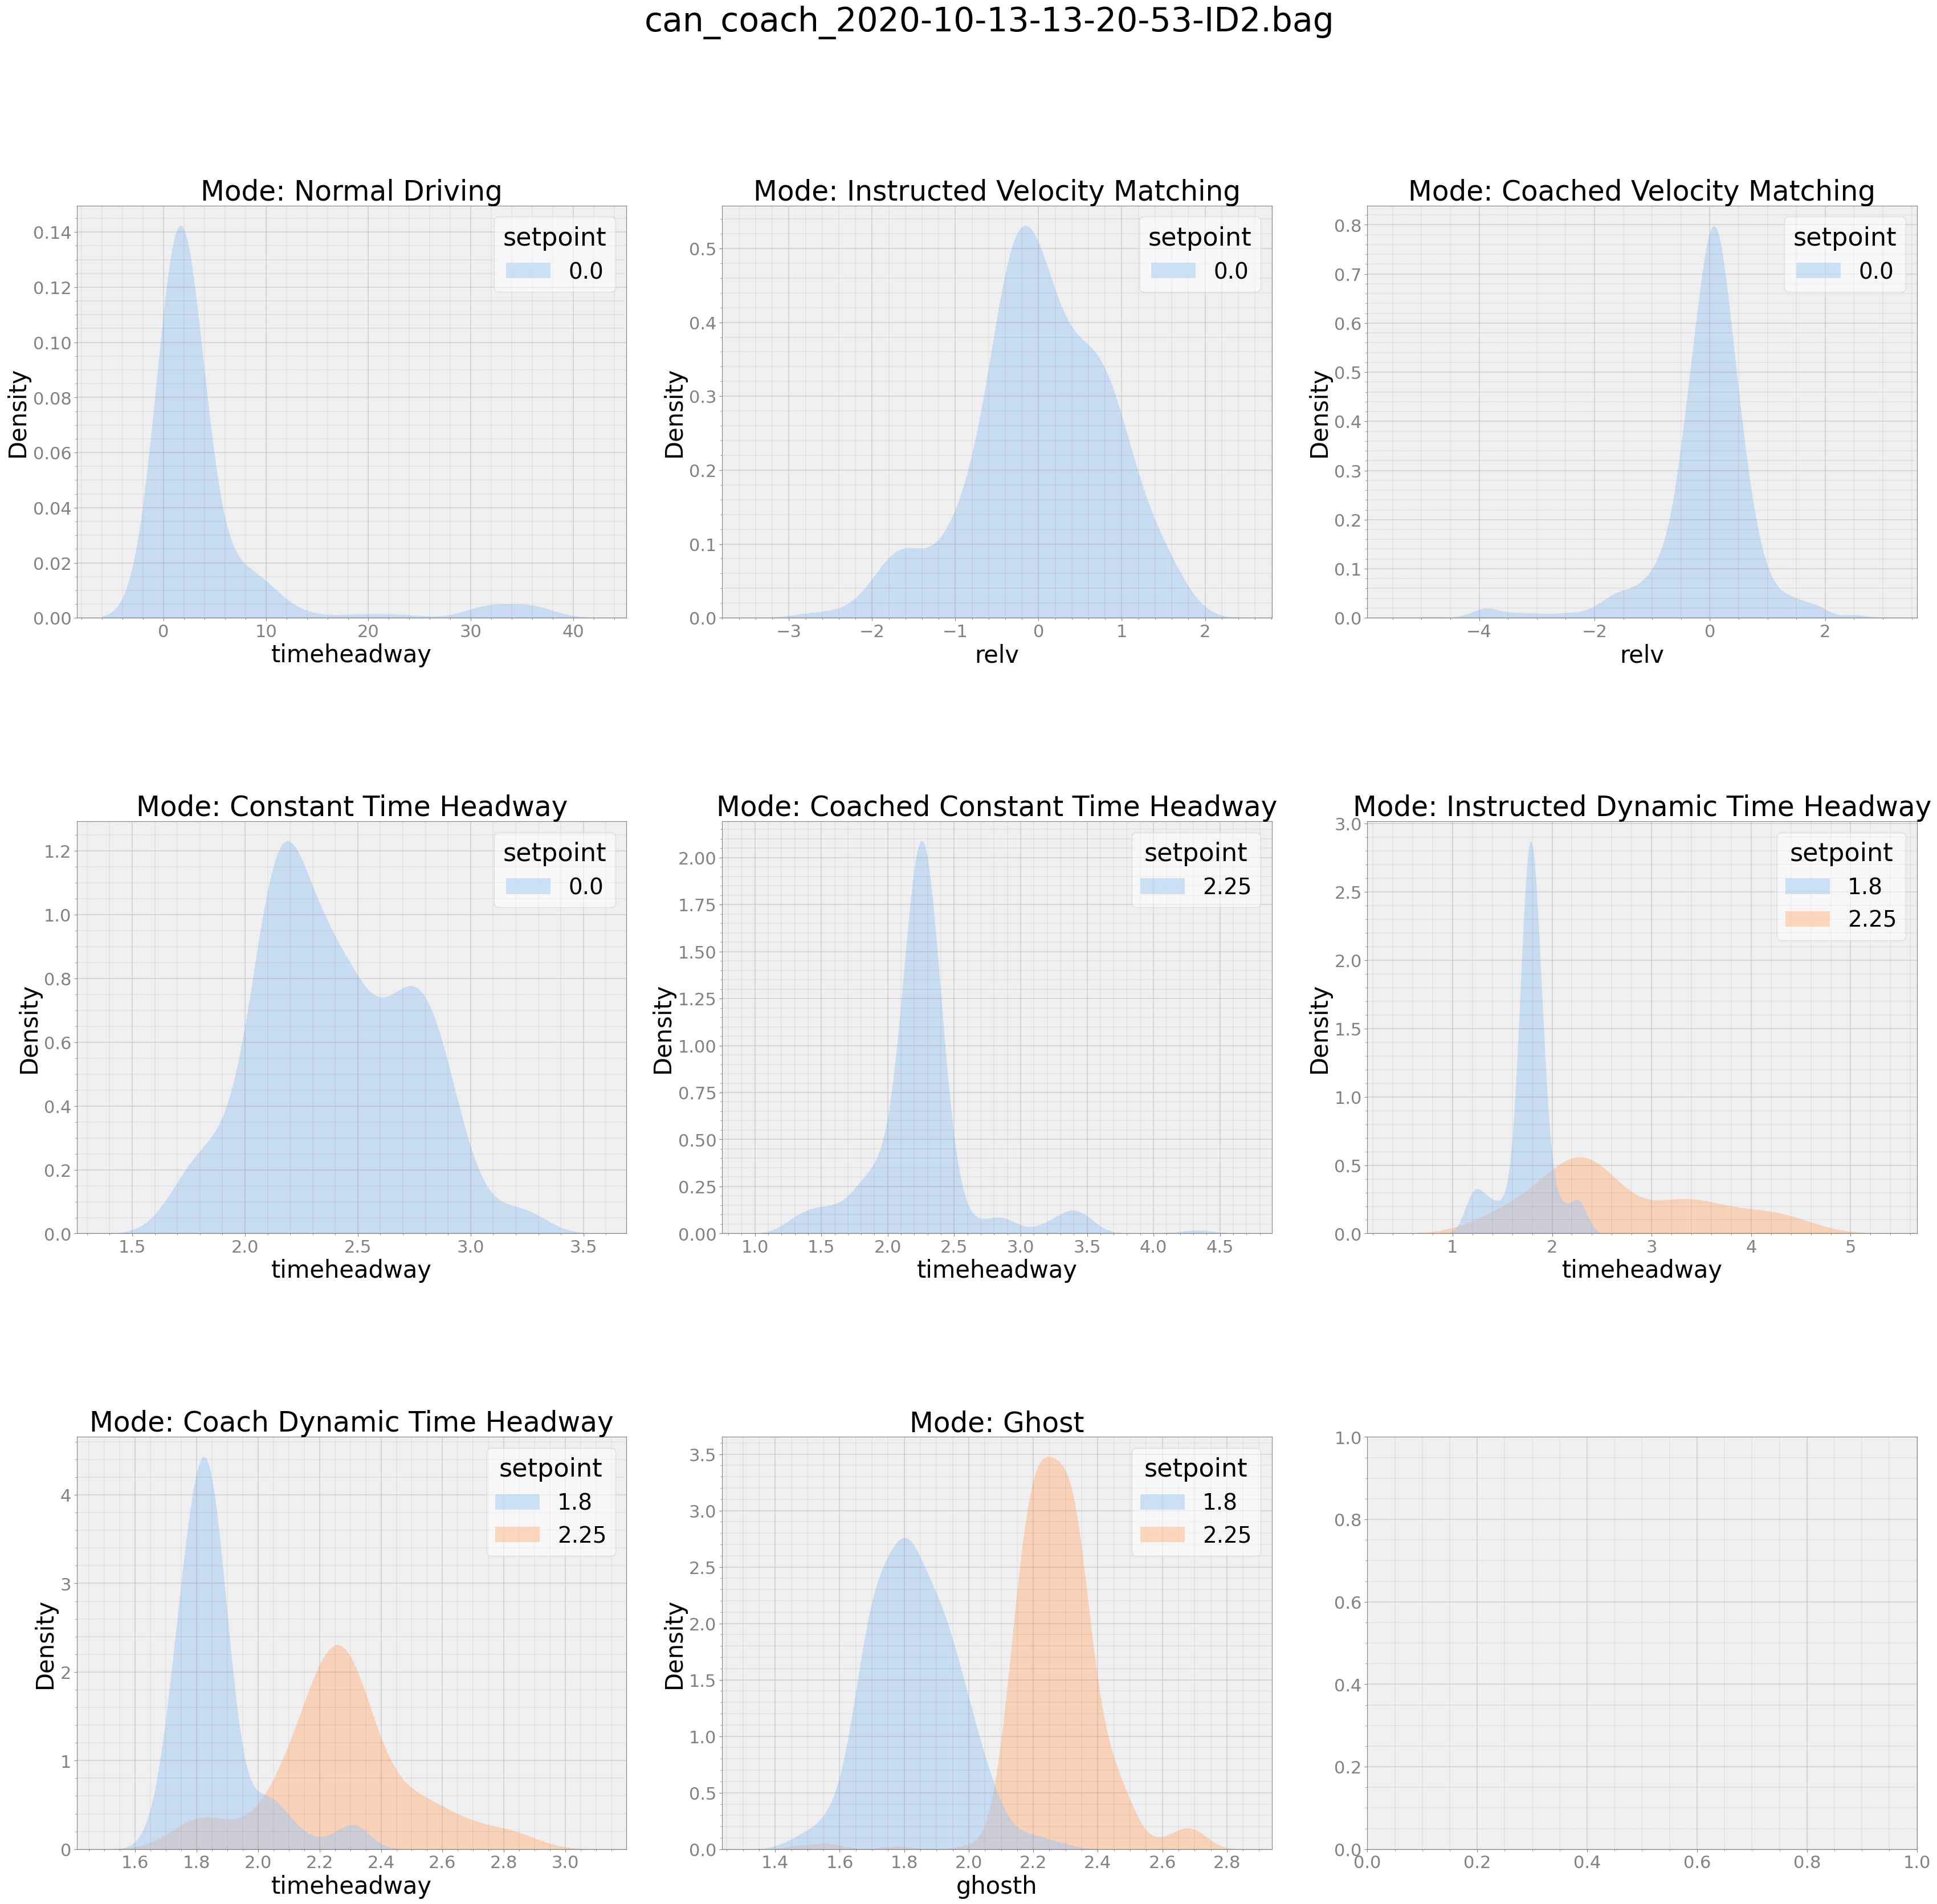

In [8]:
th_kde_plot(b0)

### Bag File with ID-3
### Time headway plot, KDE plot

Analyzing Timestamp and Data Rate of Speed
Interquartile Range of Rate for Speed is 8.258500774138874 


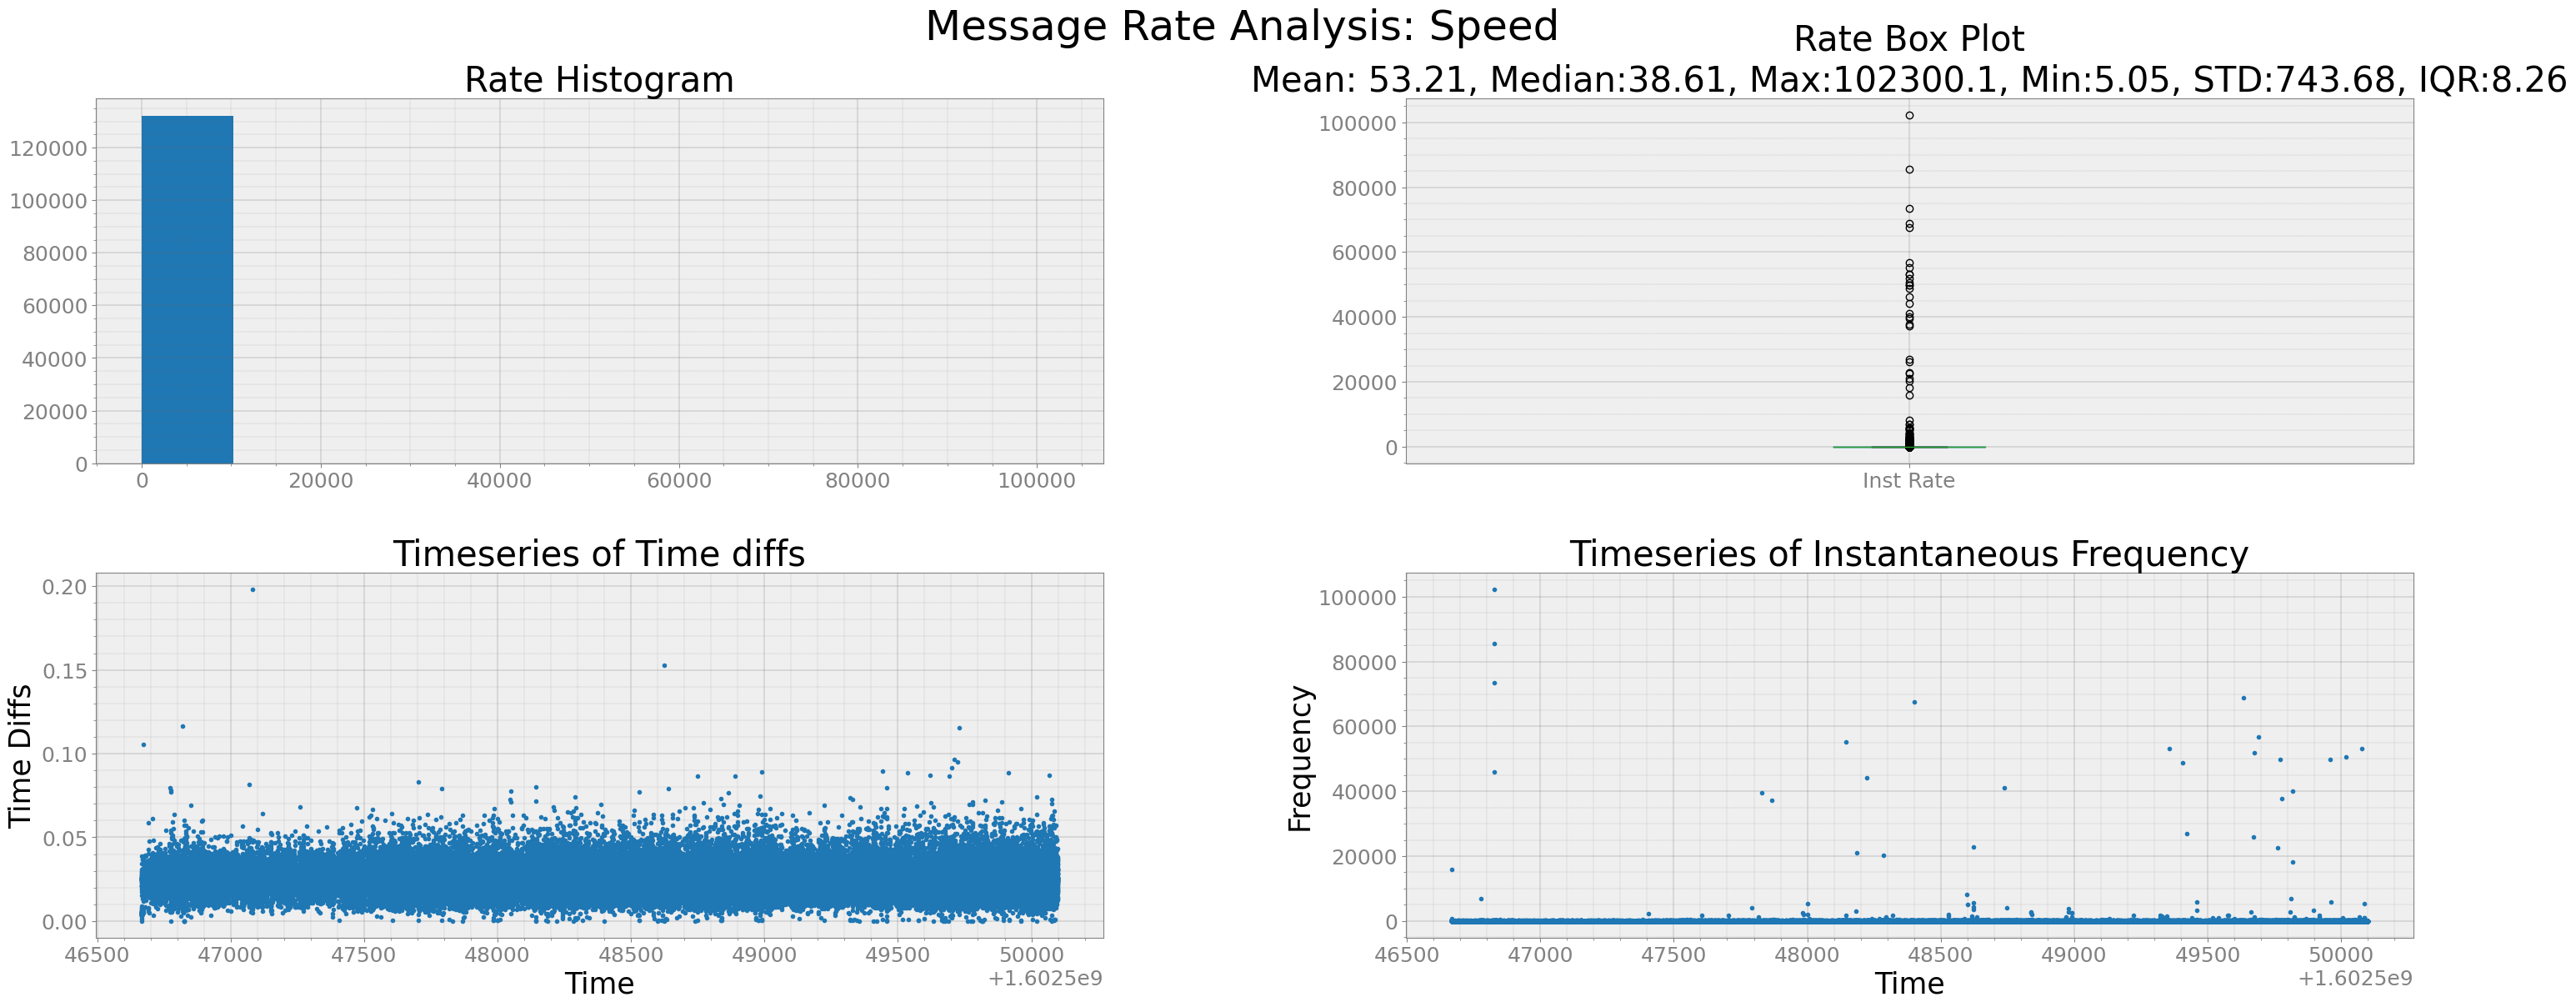

Analyzing Timestamp and Data Rate of Space Gap
Interquartile Range of Rate for Space Gap is 0.26193492586543066 


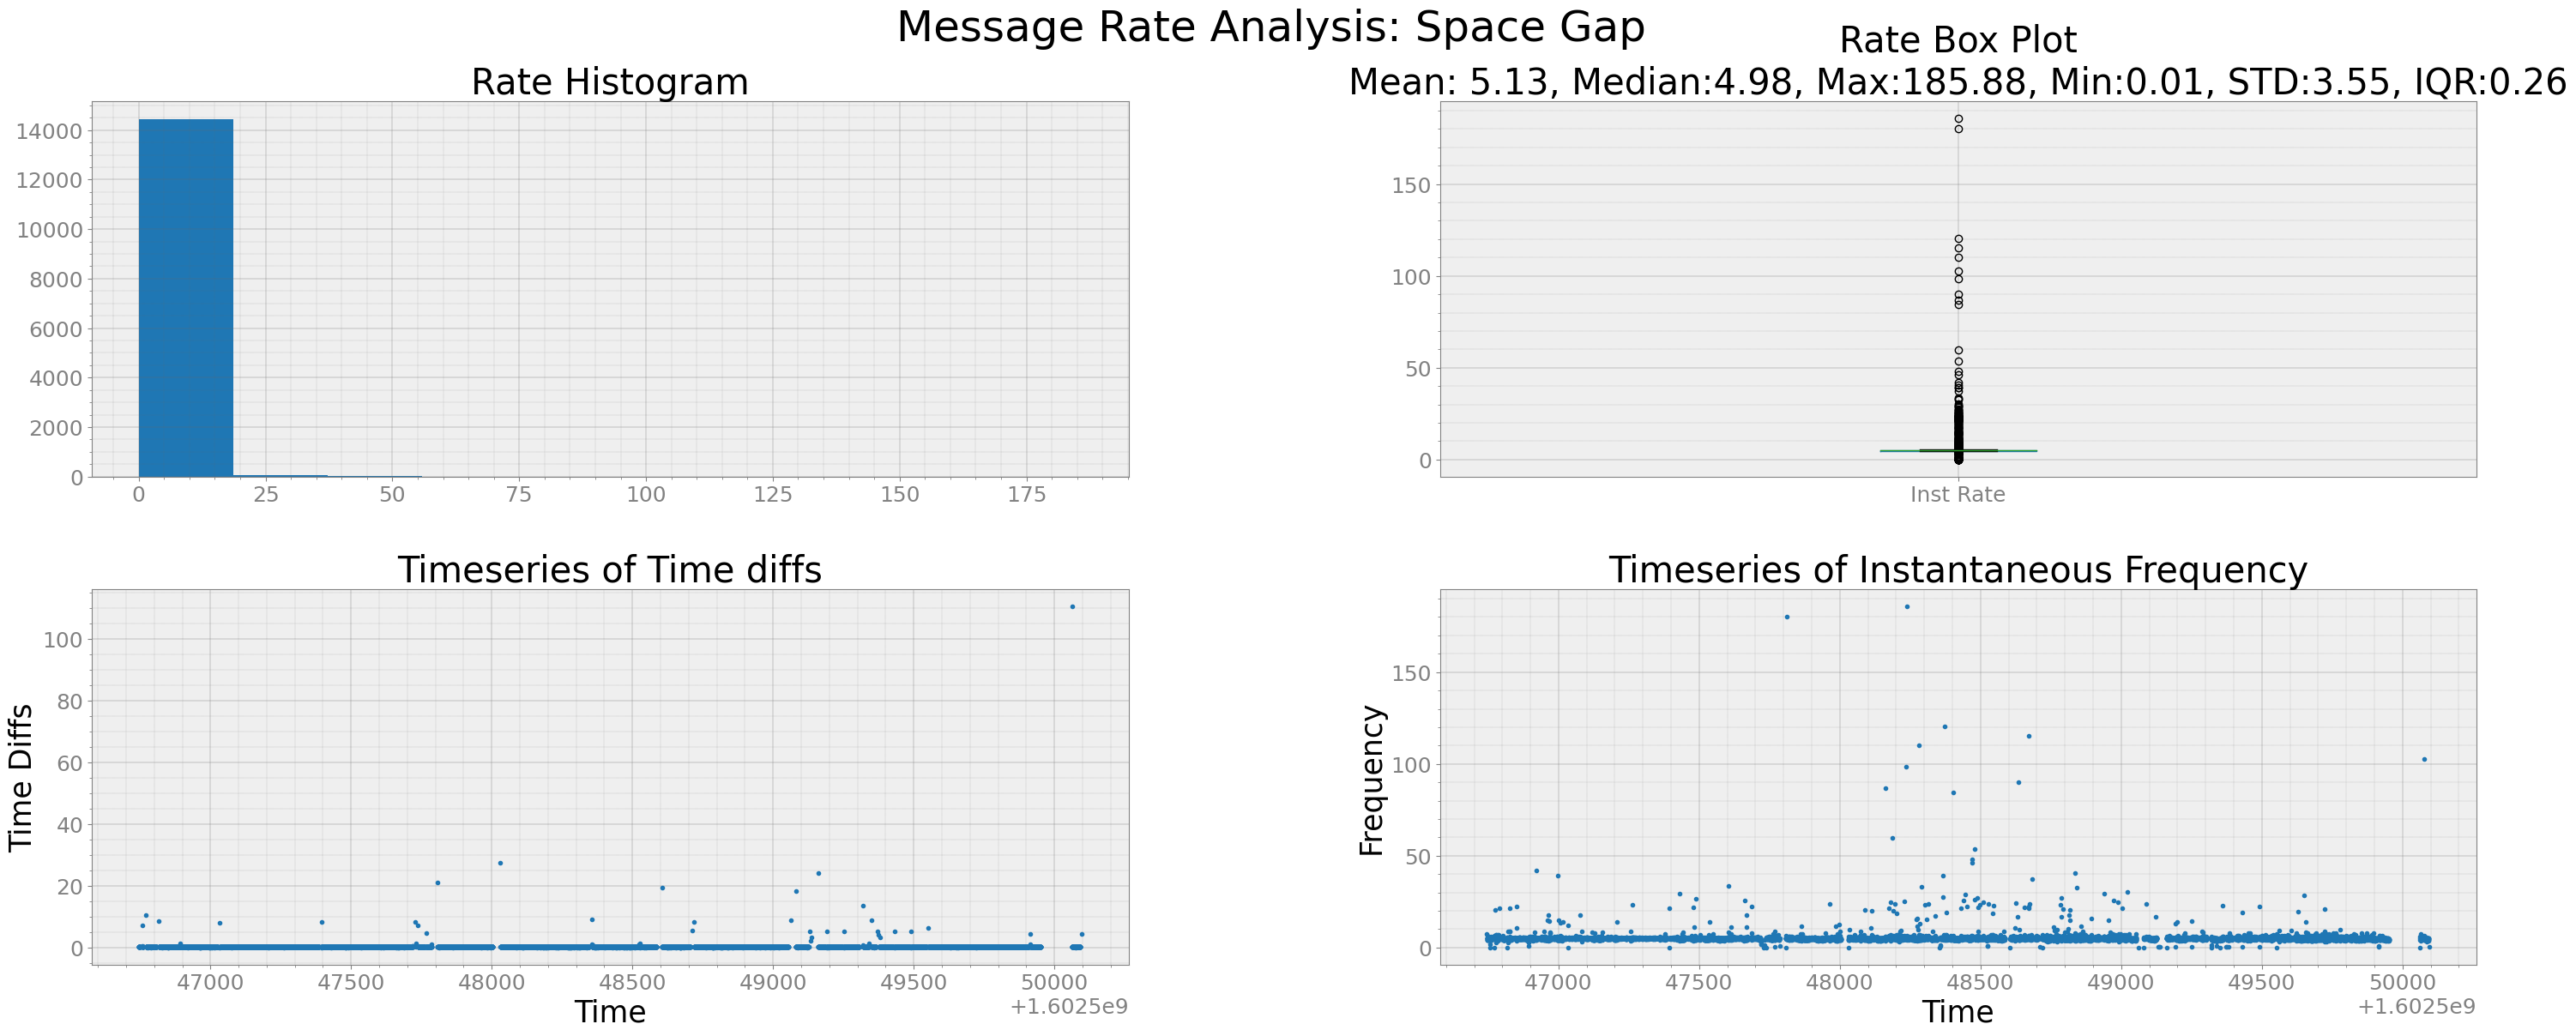

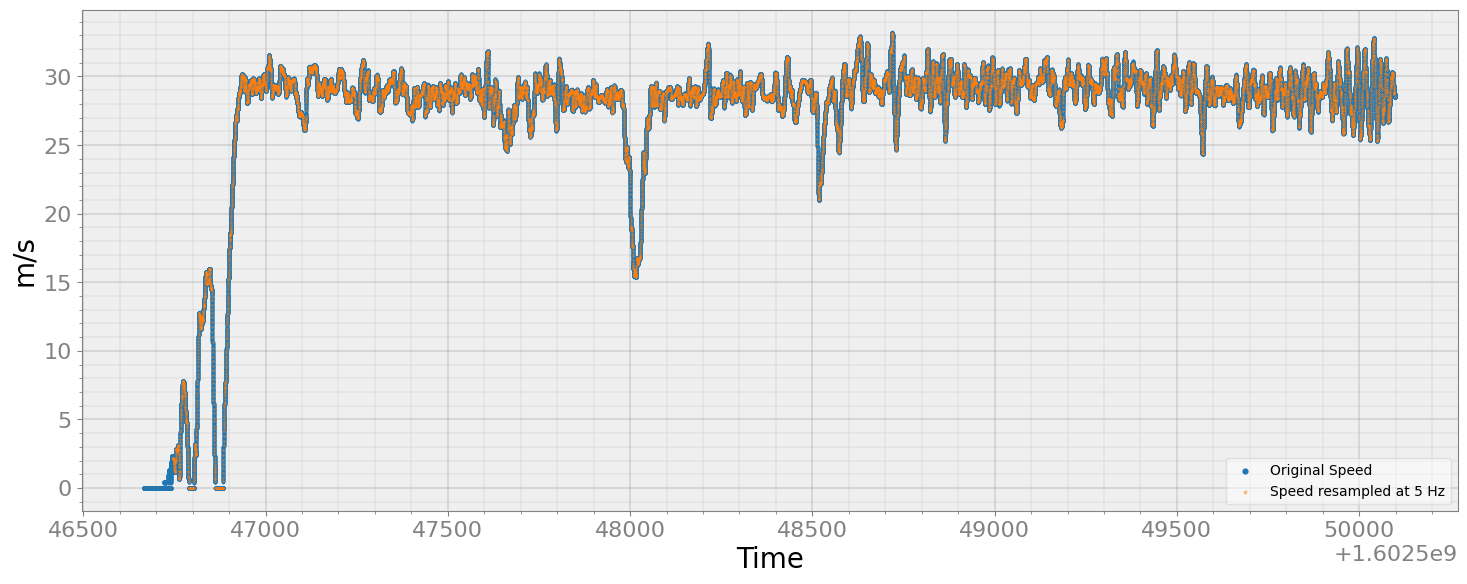

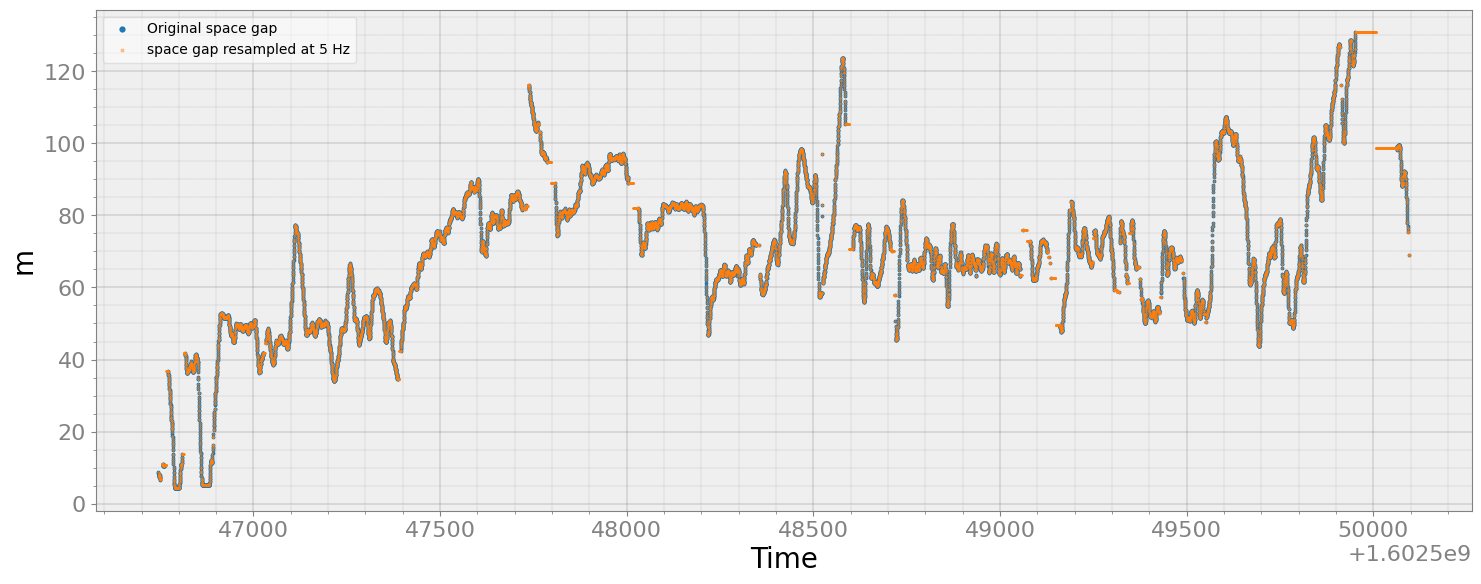

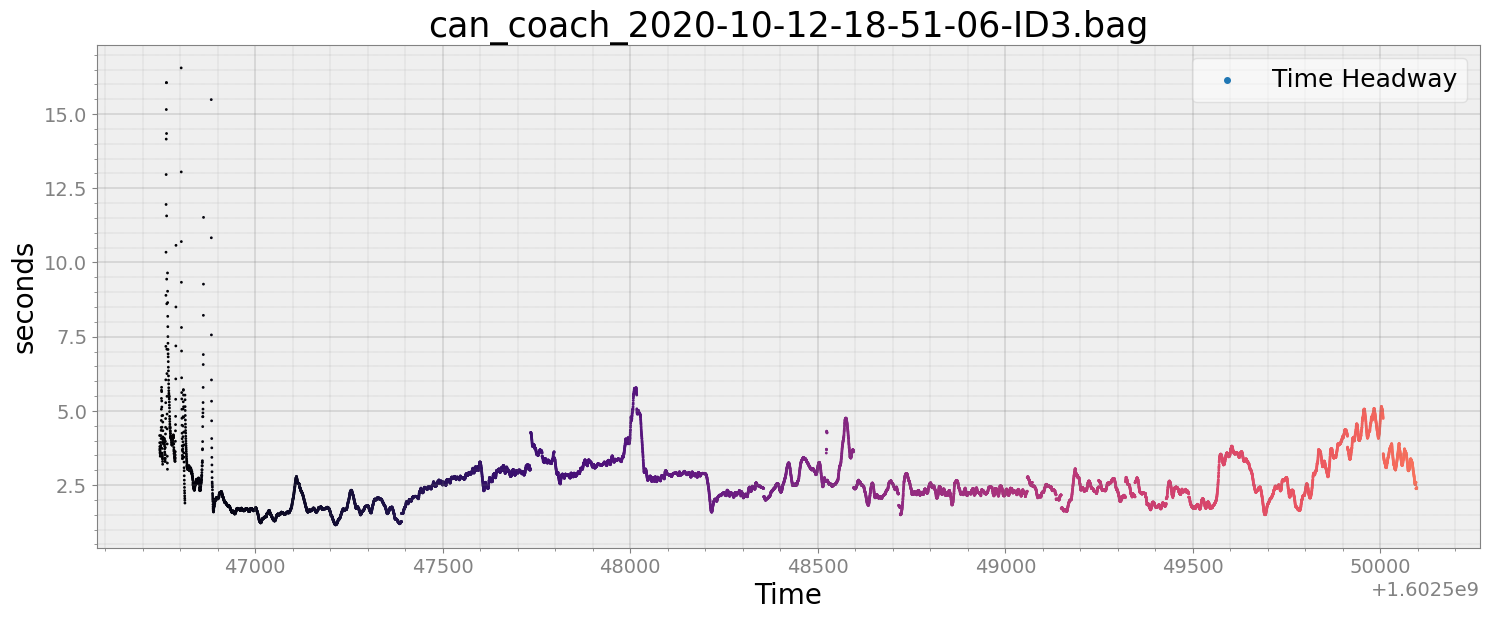

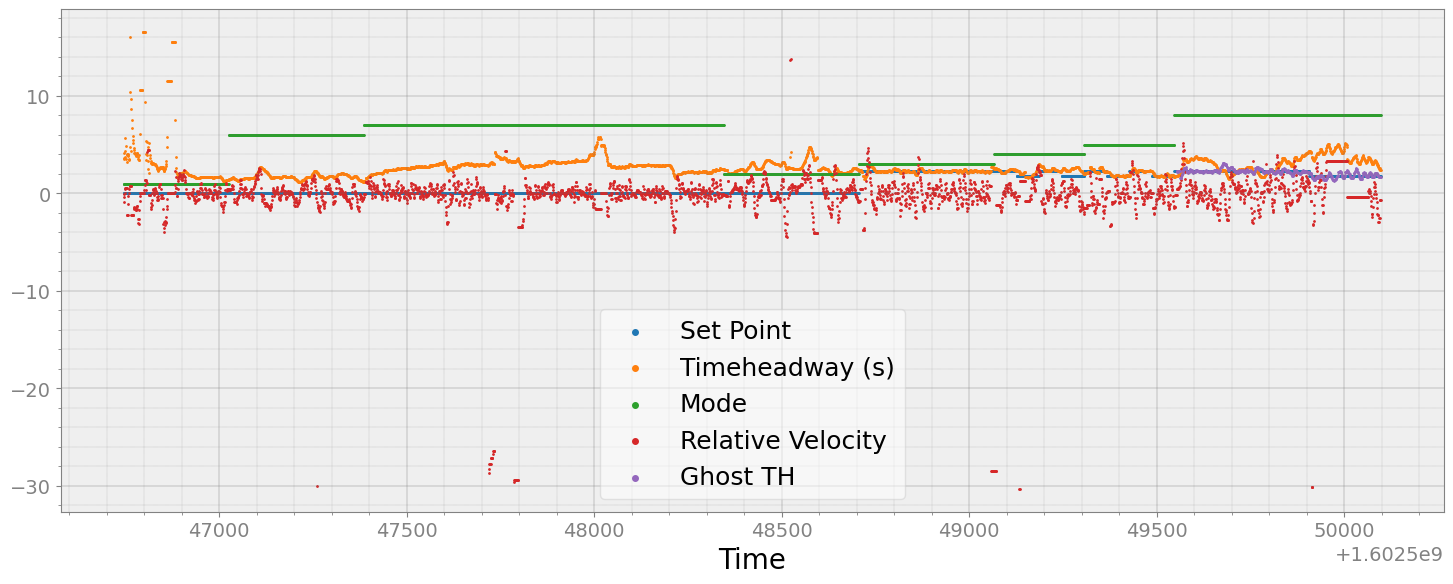

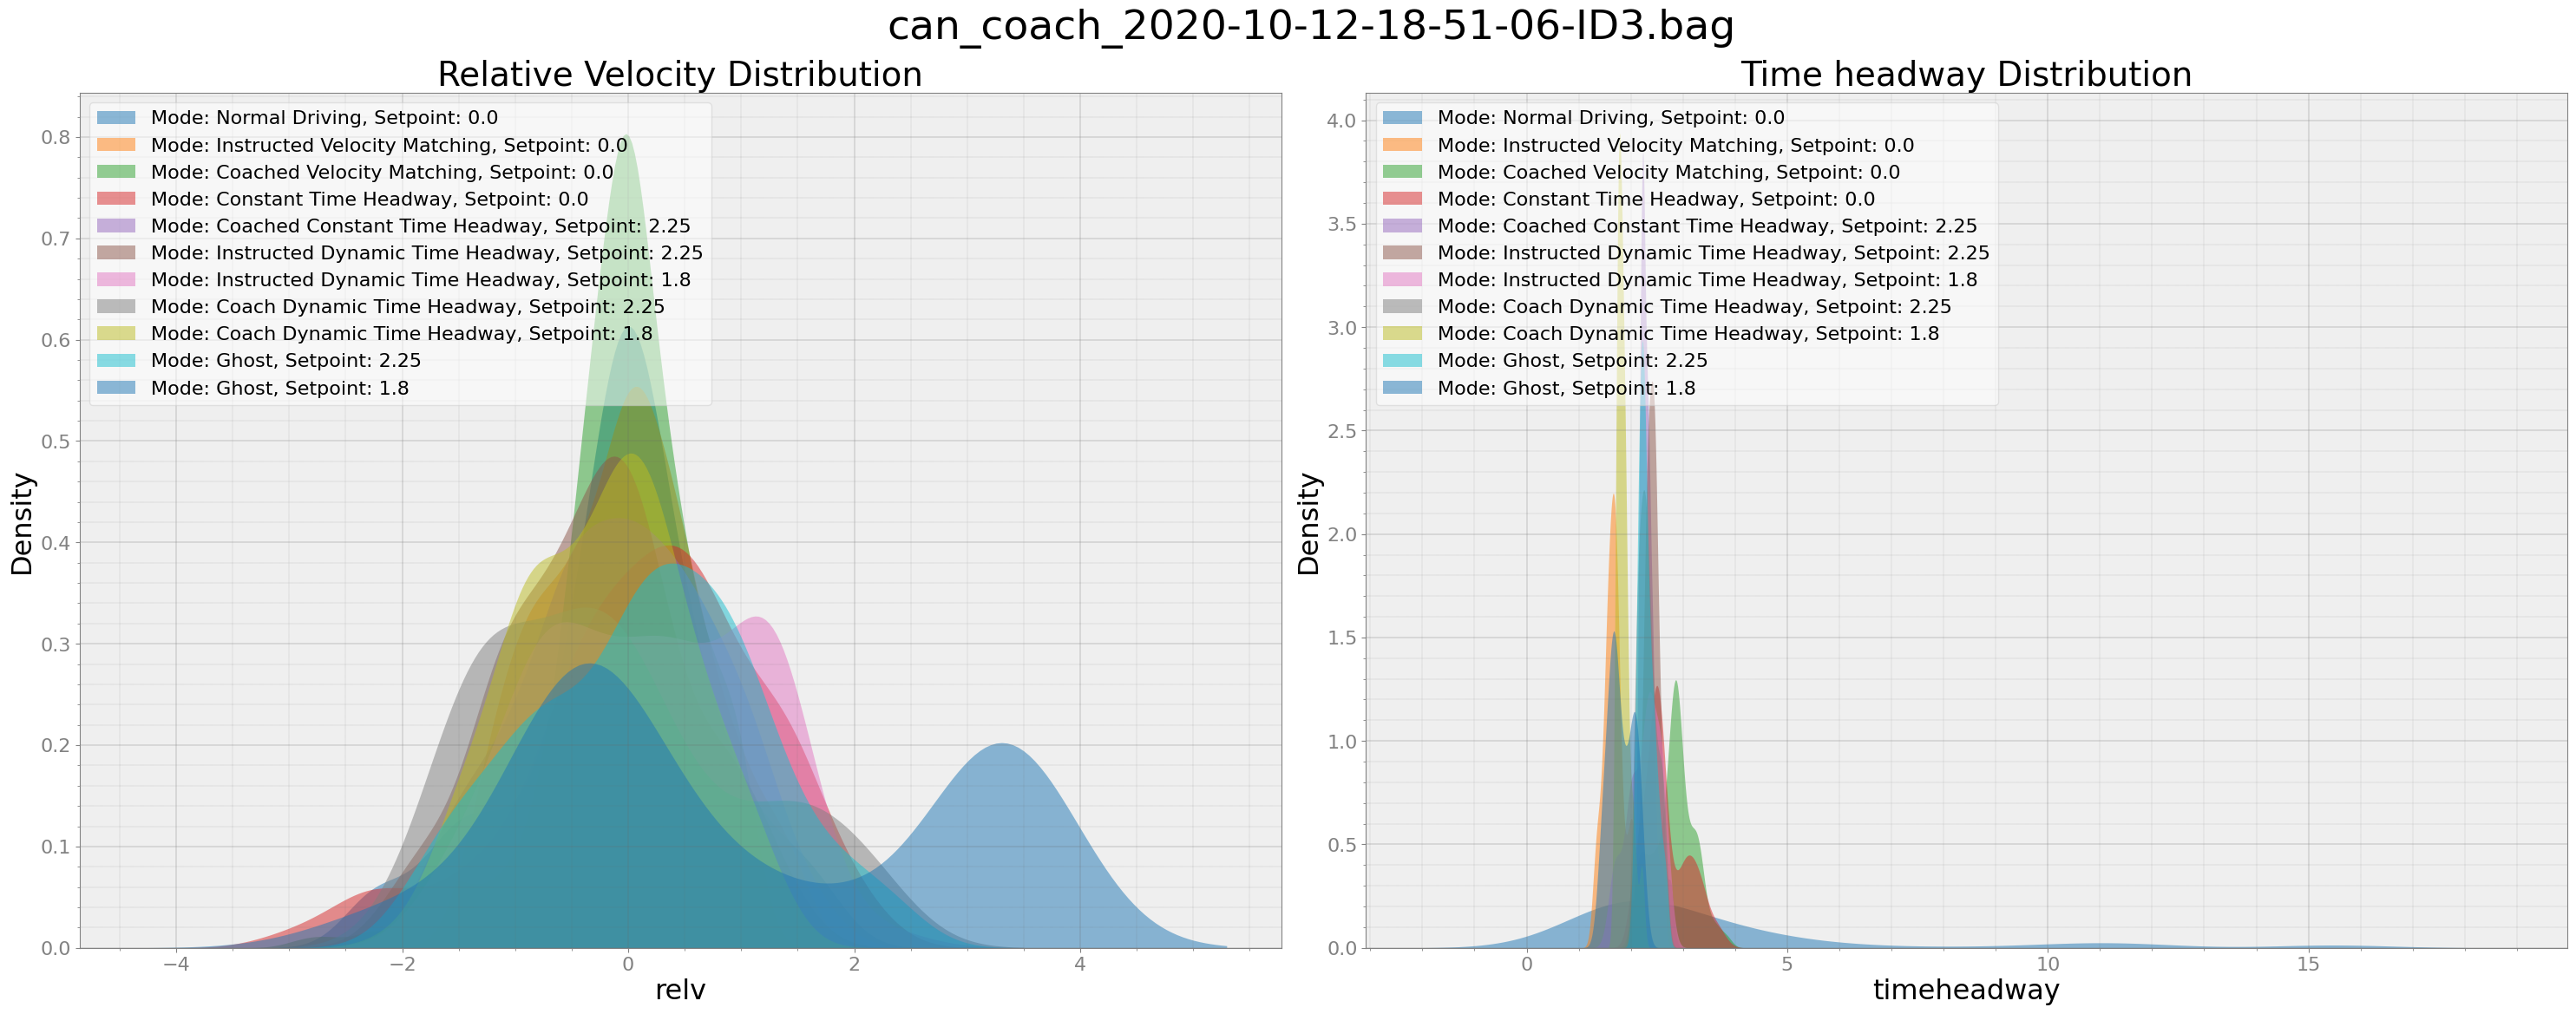

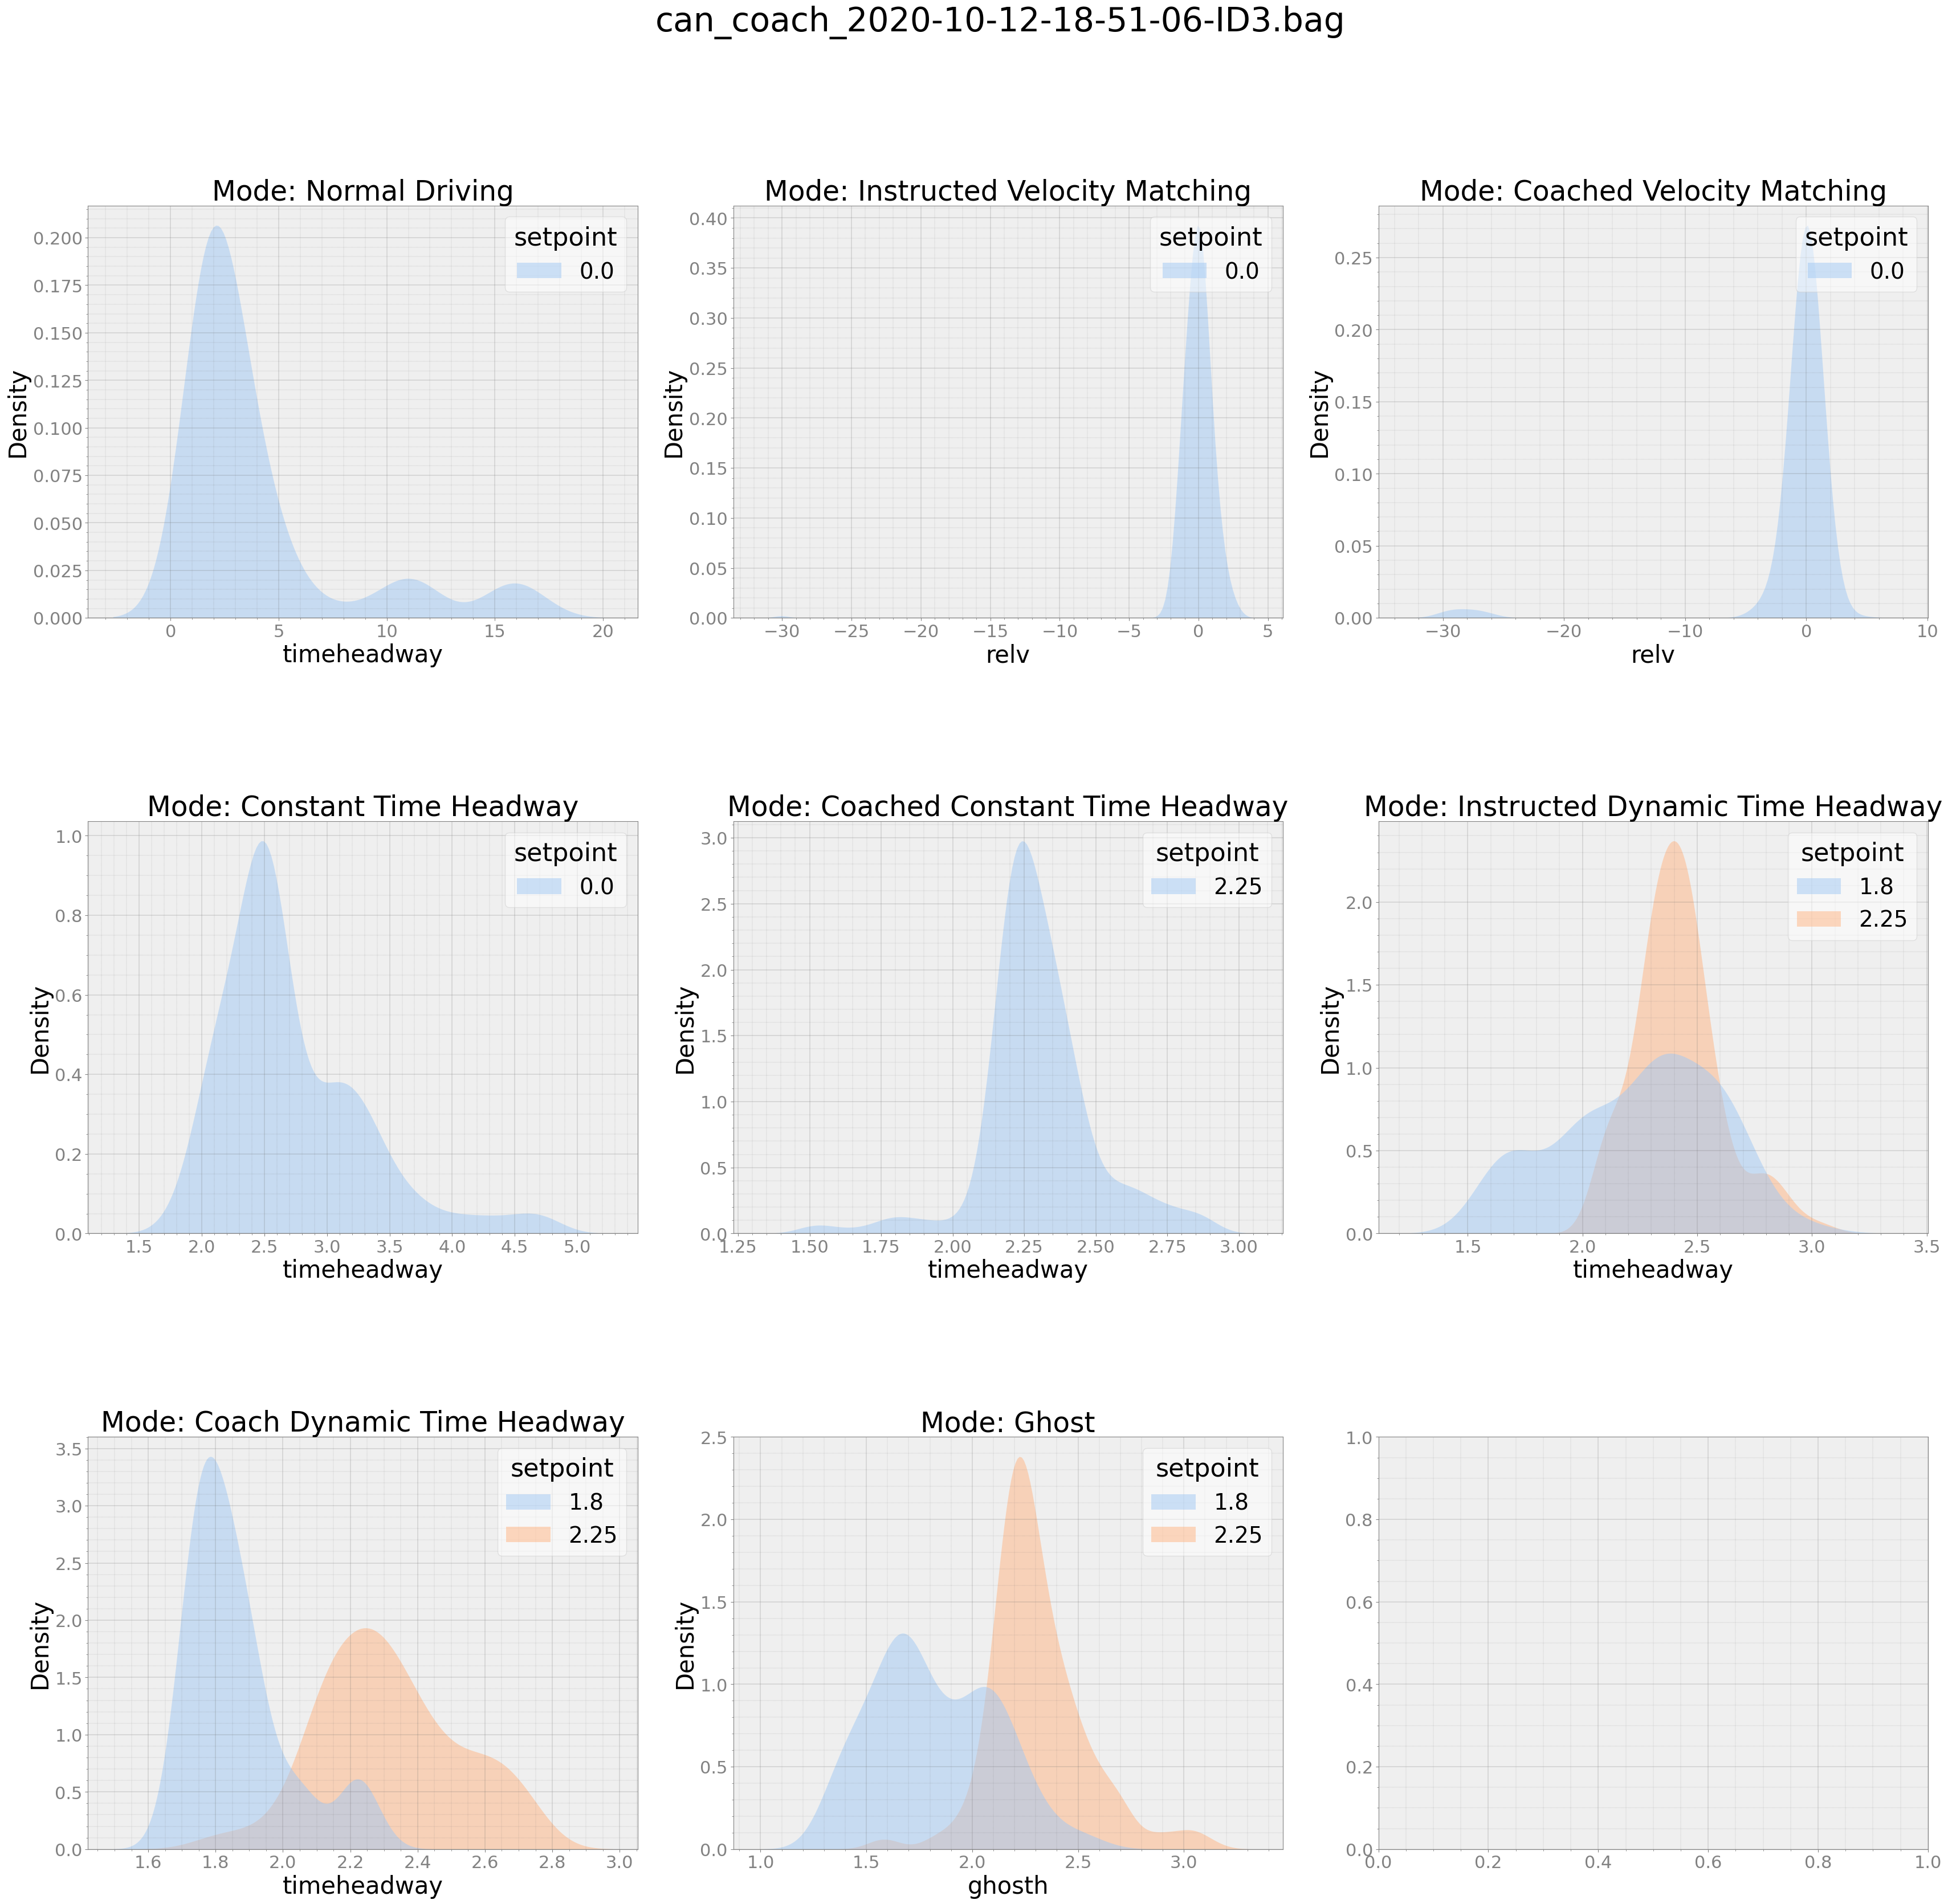

In [9]:
th_kde_plot(b1)

### Bag File with ID-1
### Time headway plot, KDE plot

Analyzing Timestamp and Data Rate of Speed
Interquartile Range of Rate for Speed is 7.414480498450693 


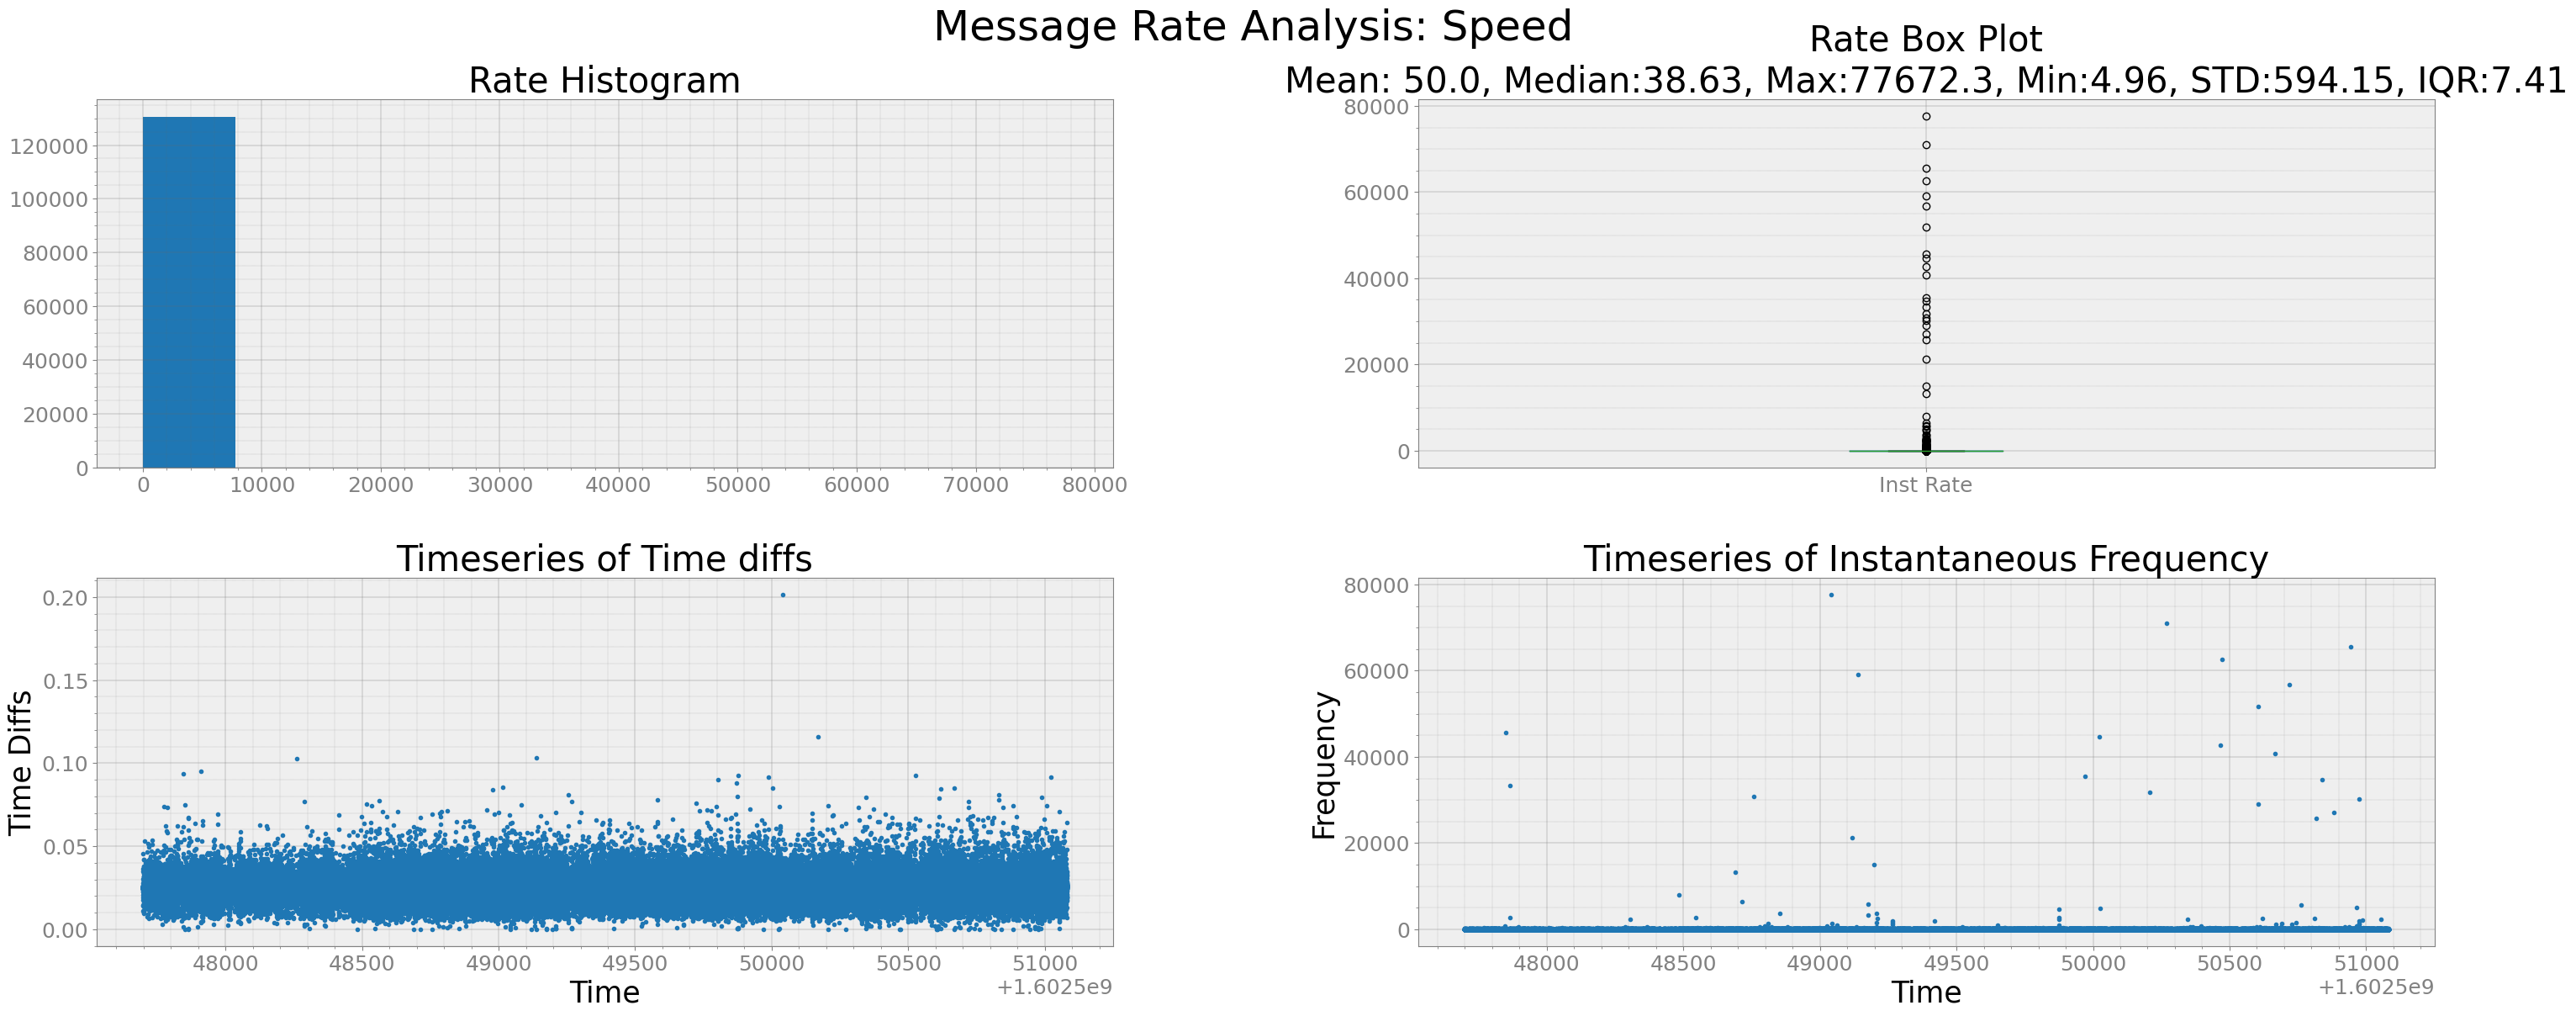

Analyzing Timestamp and Data Rate of Space Gap
Interquartile Range of Rate for Space Gap is 0.23320891629748353 


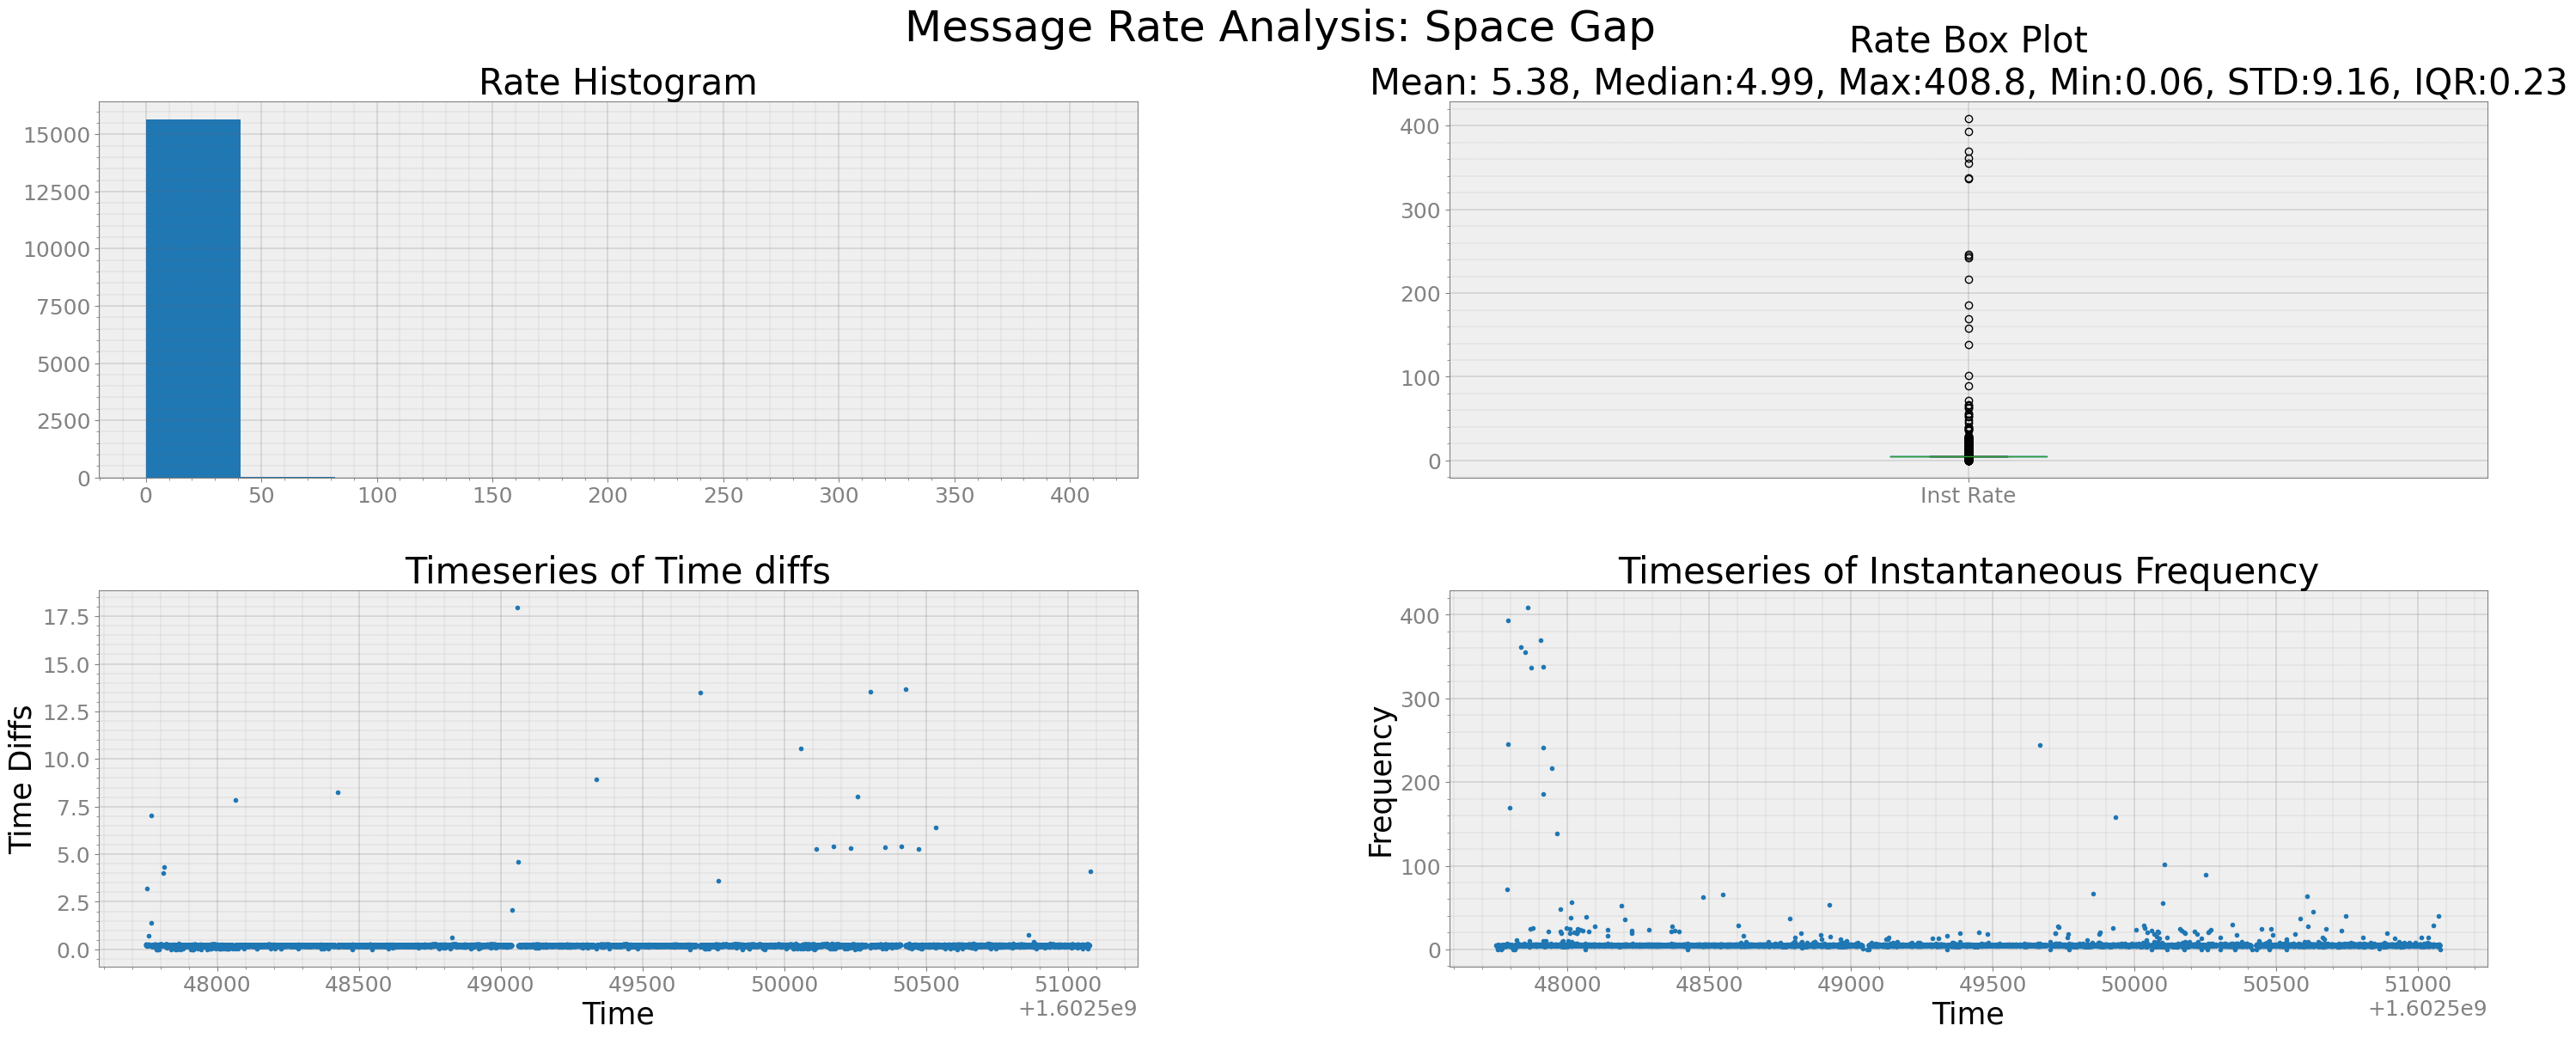

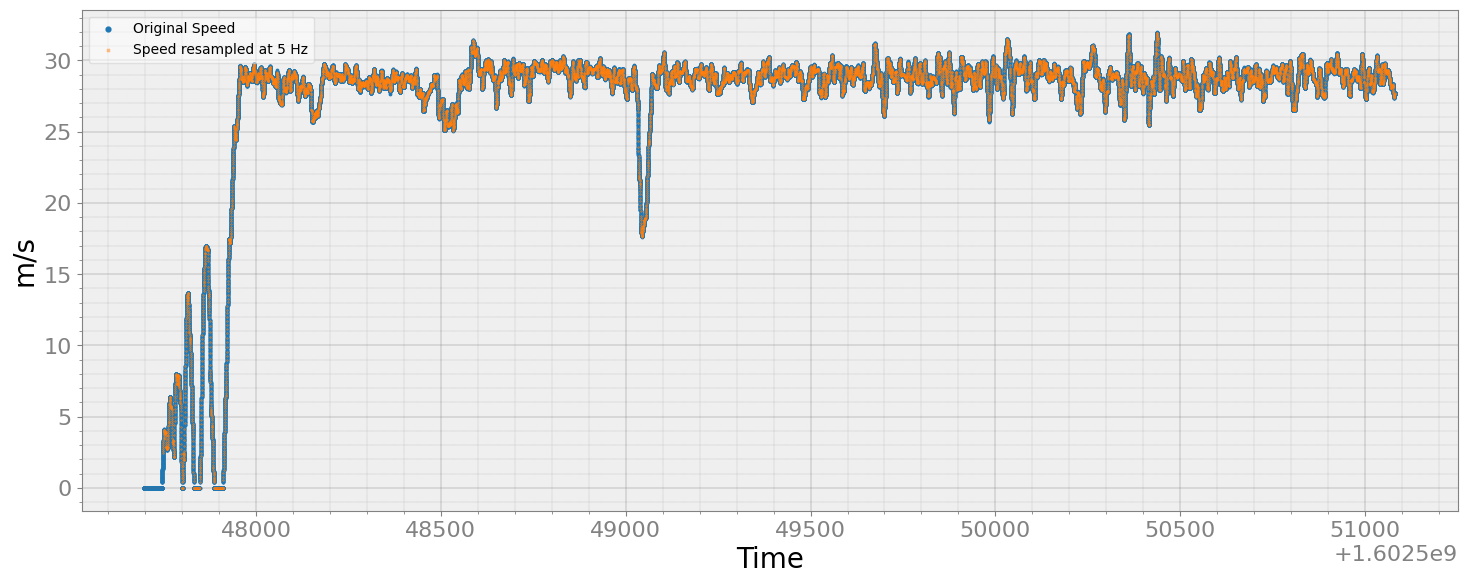

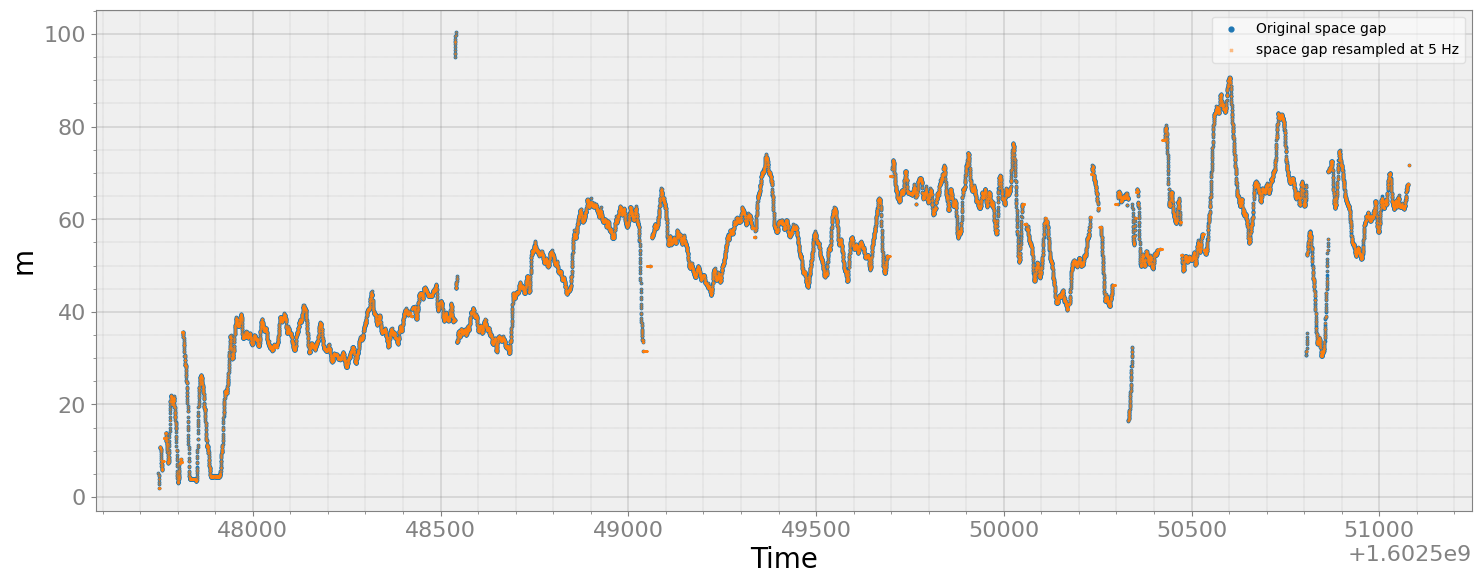

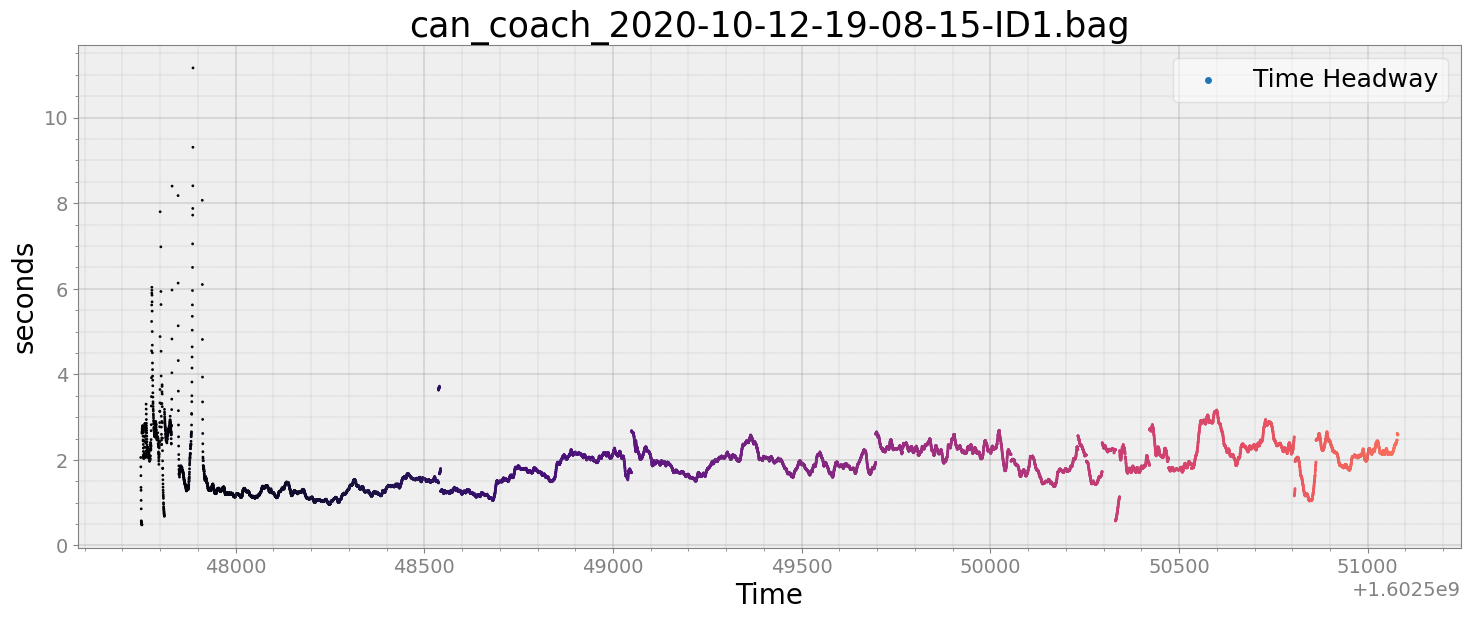

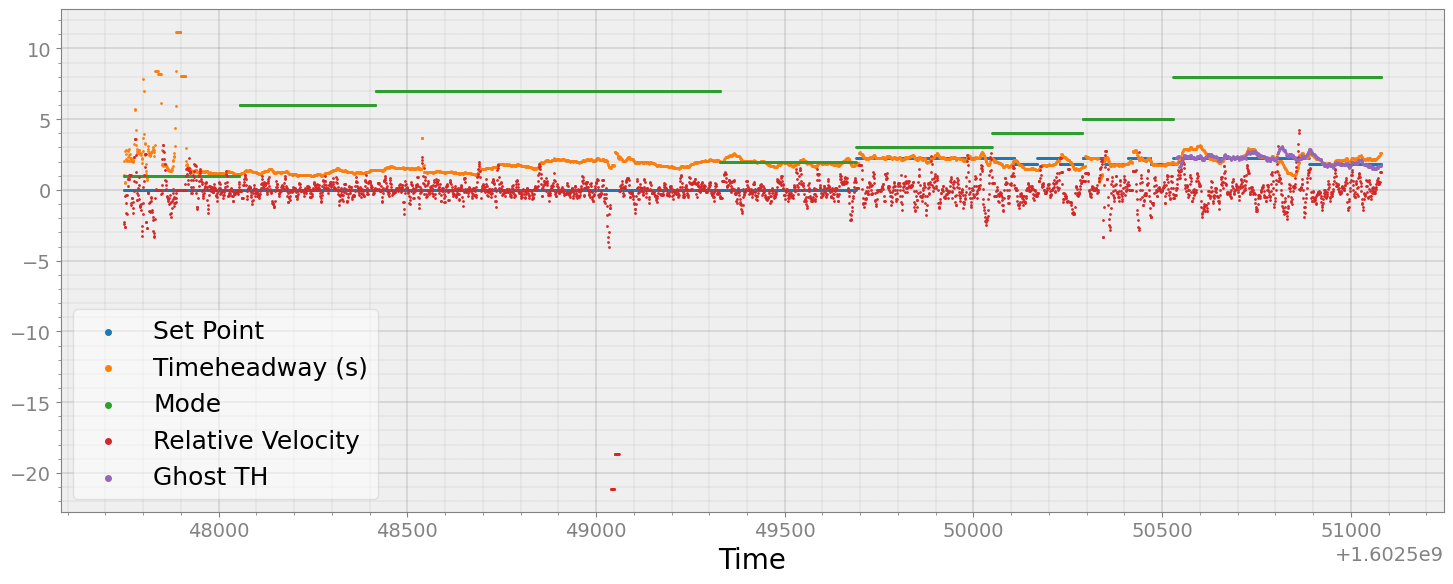

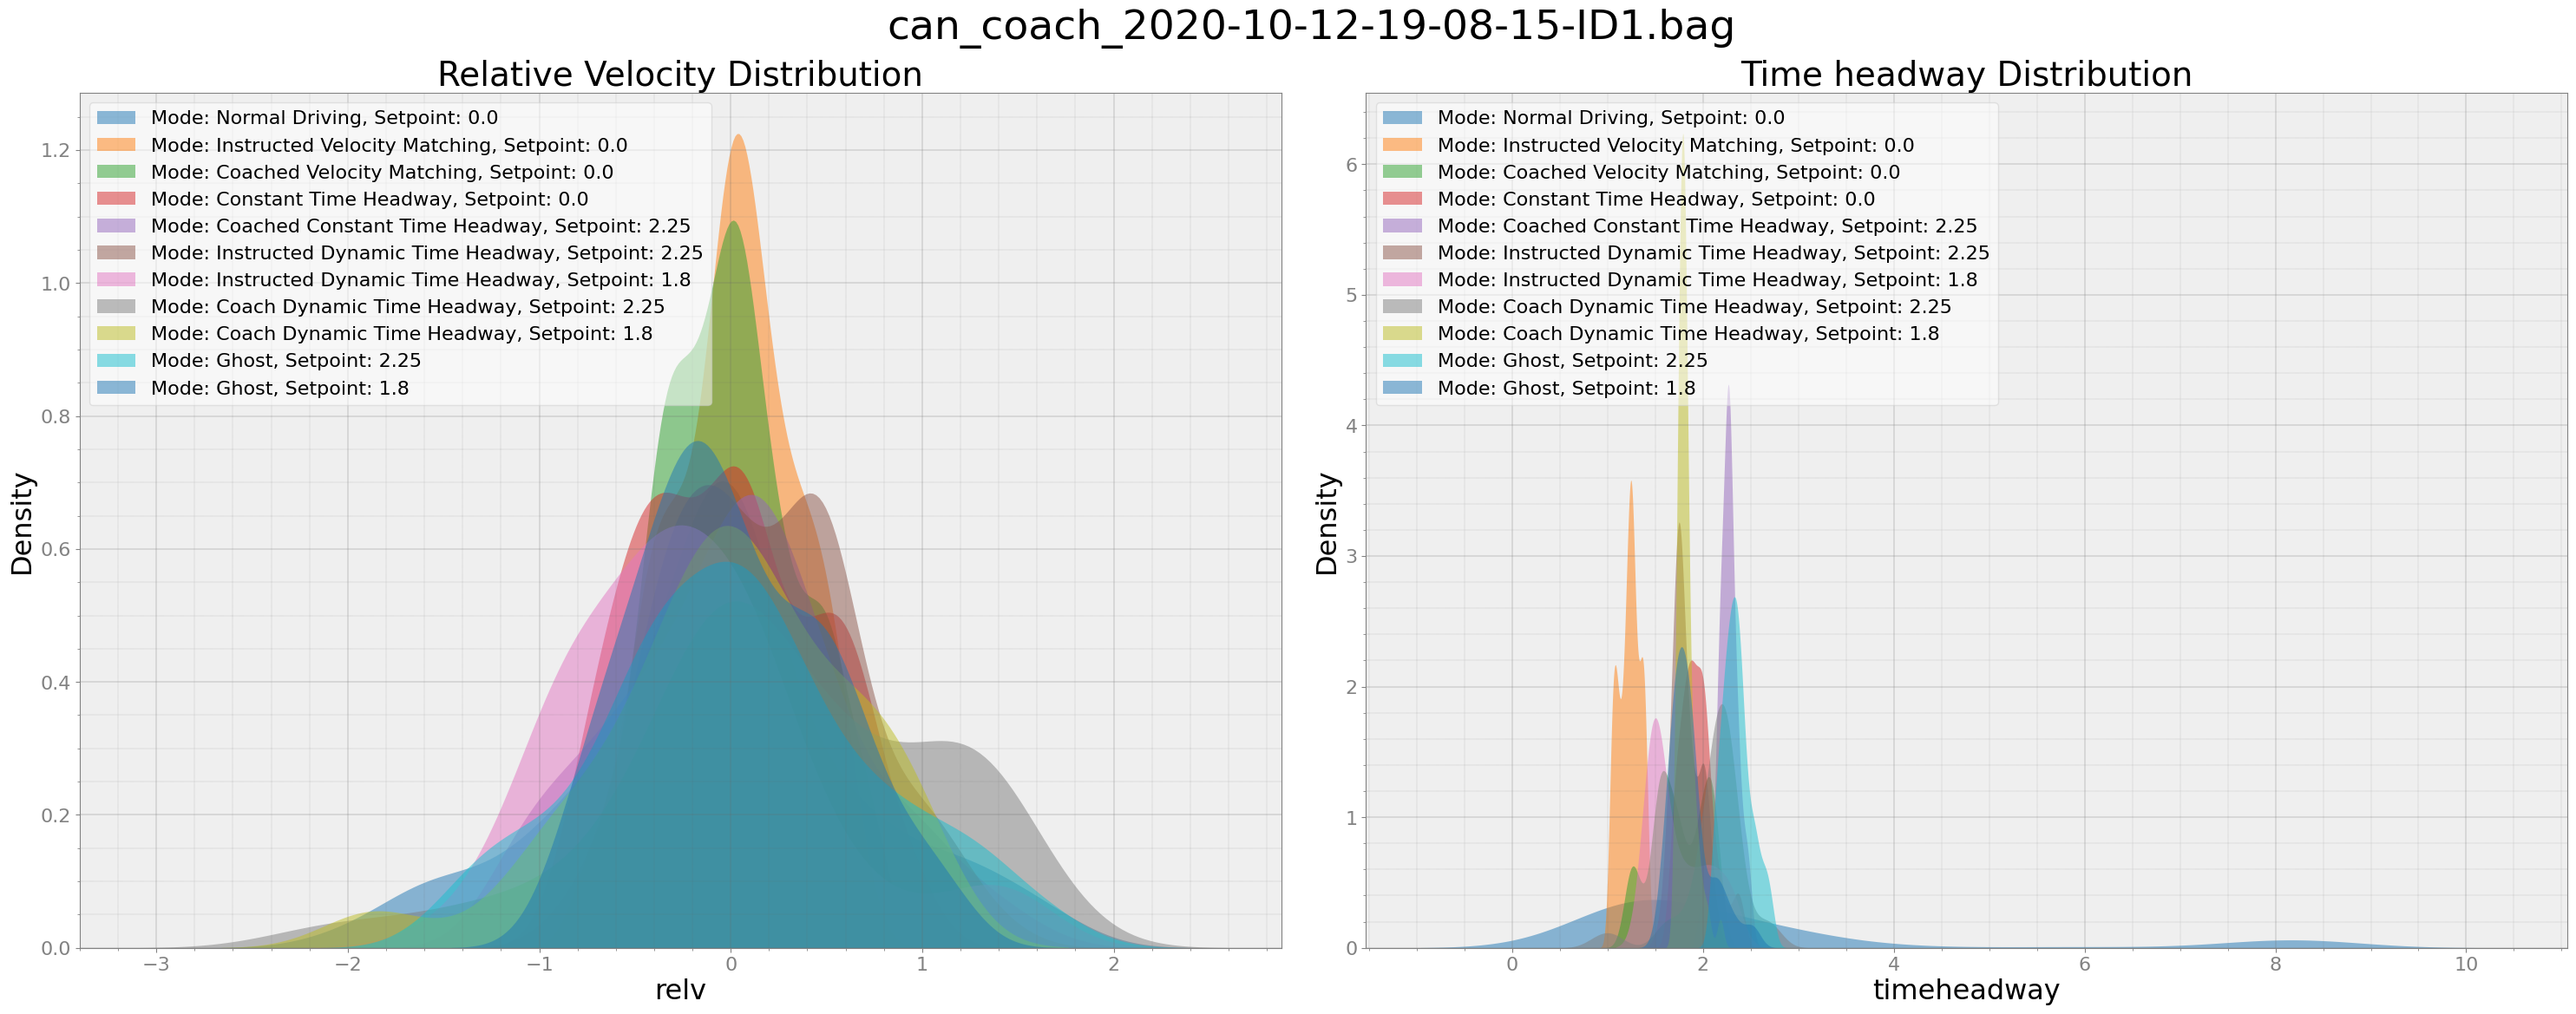

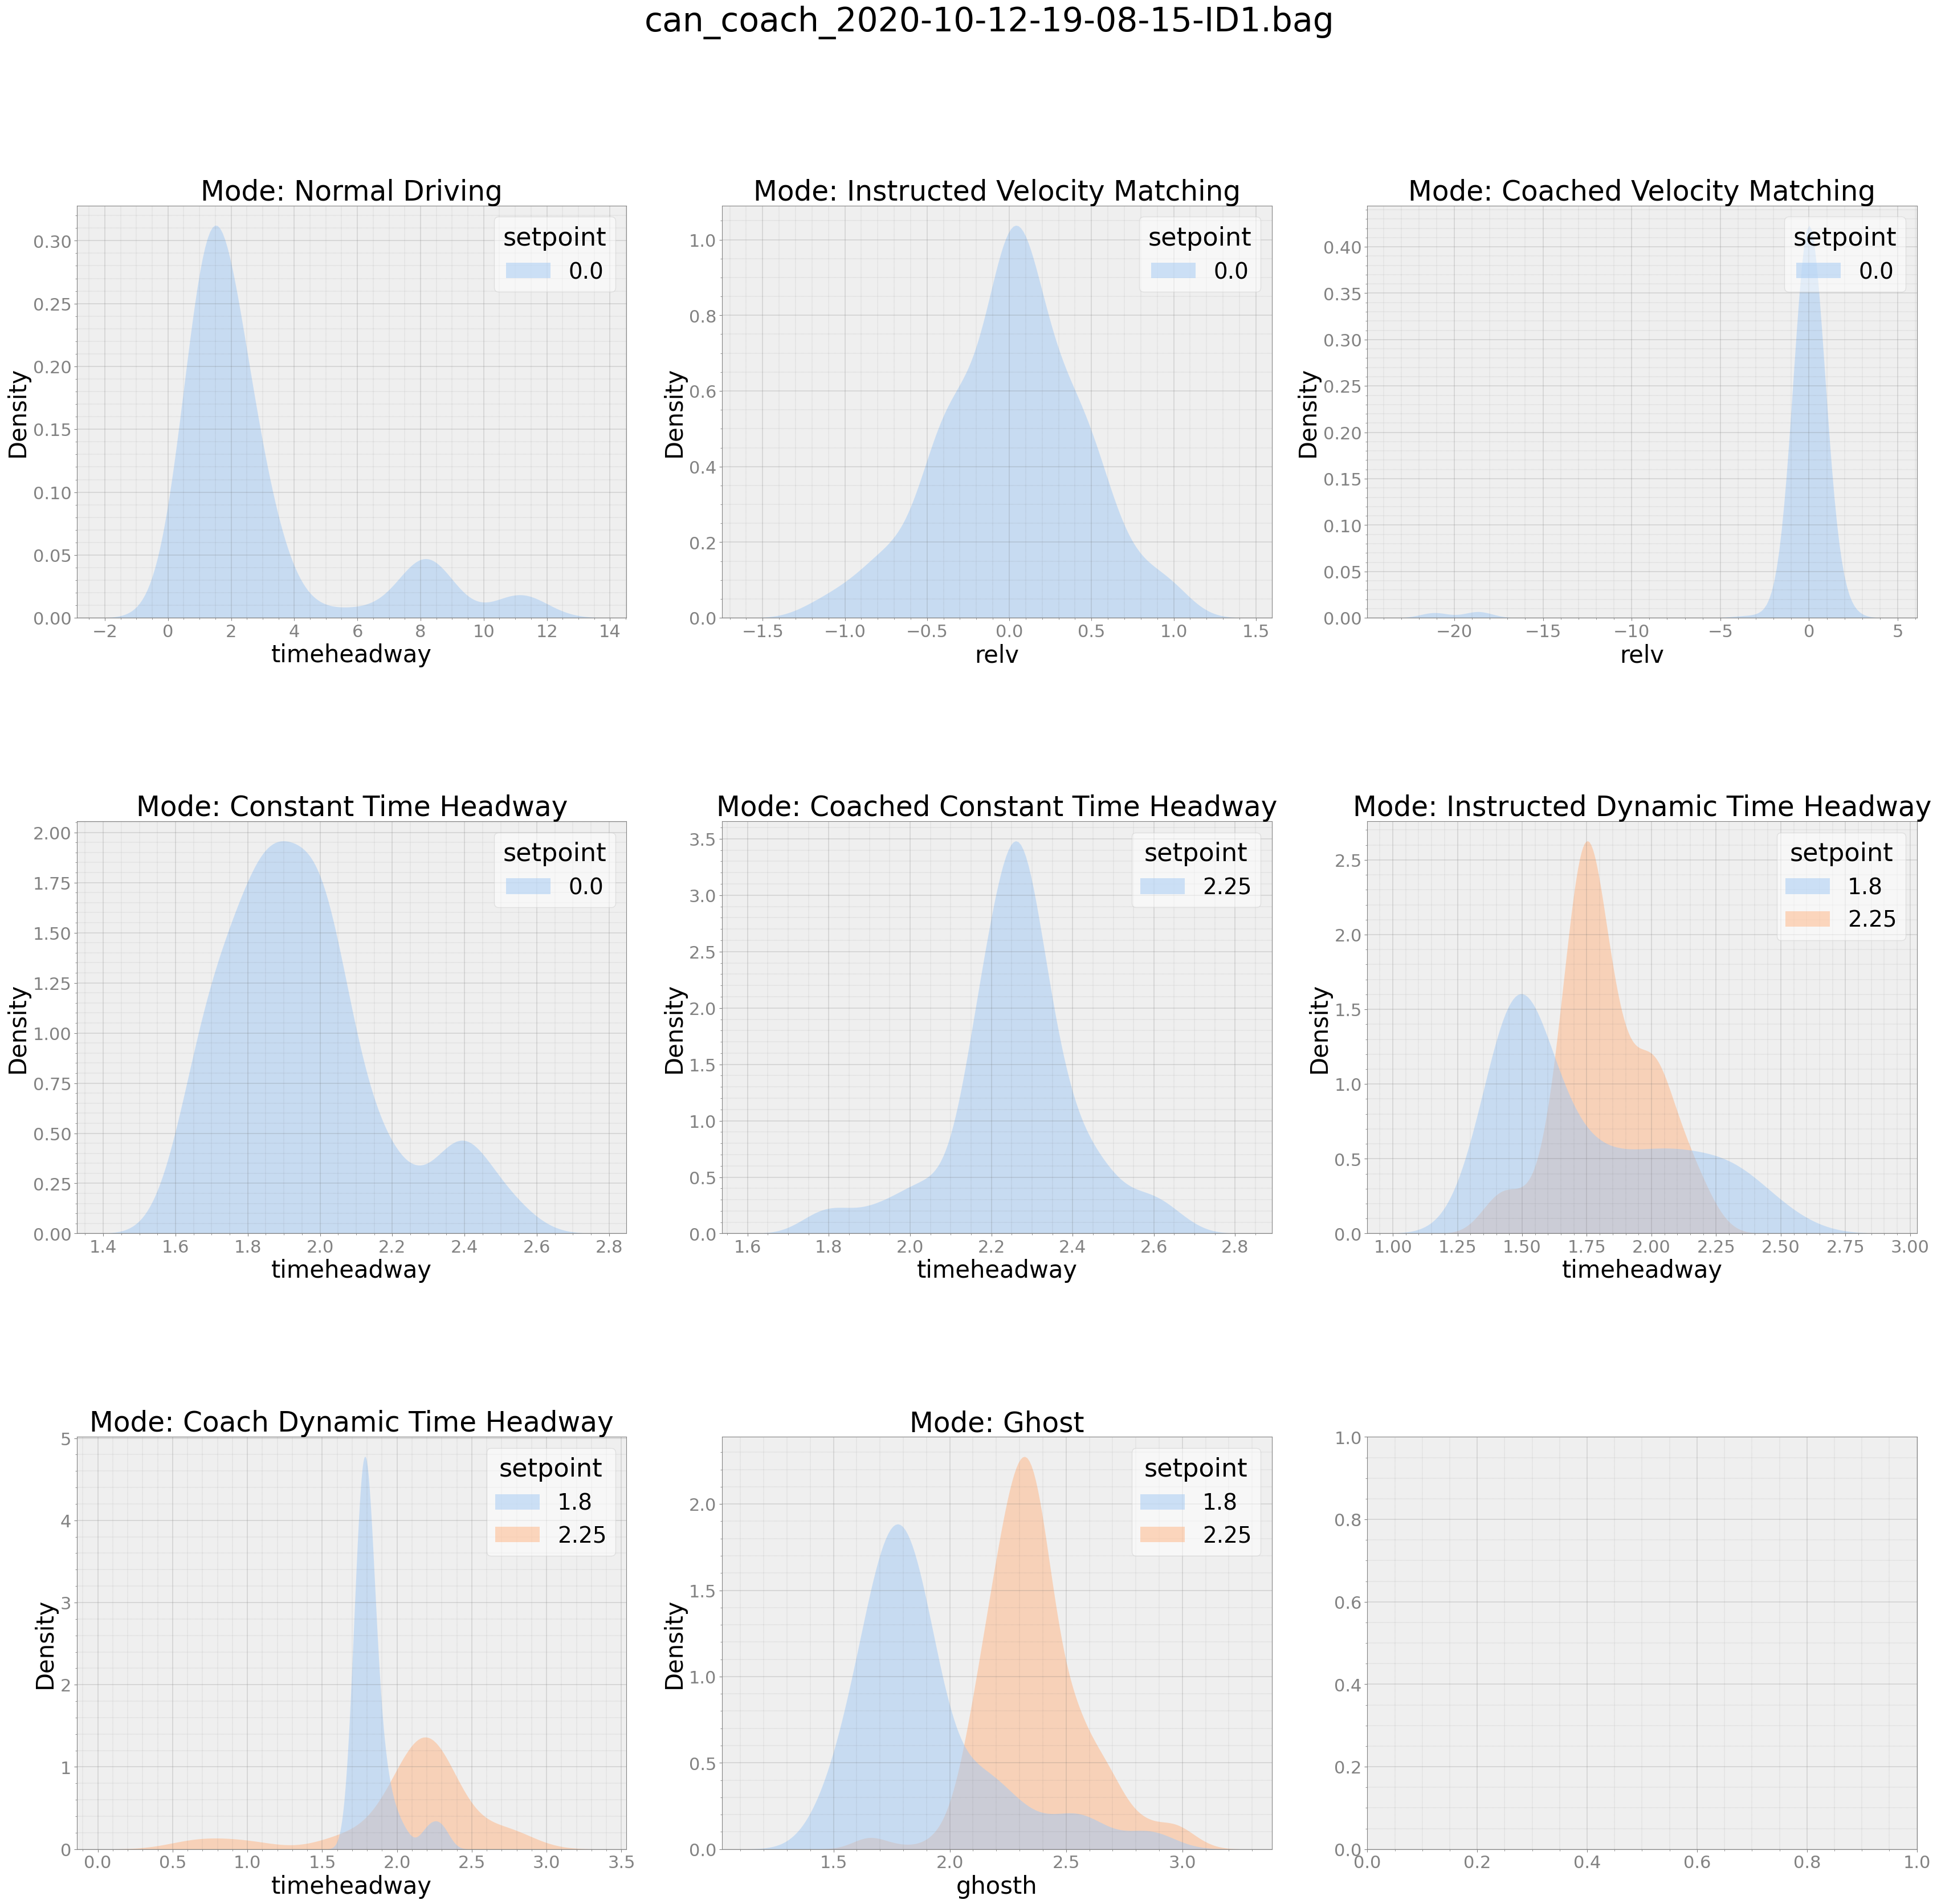

In [10]:
th_kde_plot(b2)

## Aggregated plot

In [45]:
multi_bag_kde([b0, b1, b2])